In [5]:
import pandas as pd
import numpy as np
import sys
sys.path.append("D:/Graduate/singlecell/scGCOs/Simulation_Pattern/")
from simulation import *
import scGCO



exp_diff=1

pattern = "squares"

# sample_info=pd.read_csv("../processed_data/Rep11_MOB_grid_padding_info_scgco.csv",index_col= 0)

# normalizing_factor = sample_info["total_counts"].values/np.median(sample_info["total_counts"].values)

def nomalize_based_factor(data,normalizing_factor):
    data = pd.DataFrame(data.values/normalizing_factor[:,np.newaxis], columns=data.columns, index=data.index)
    return data

def get_coords(index):
    coords = pd.DataFrame(index=index)
    coords['x'] = index.str.split('x').str.get(0).map(float)
    coords['y'] = index.str.split('x').str.get(1).map(float)
    return coords

#for noise in [0.4]:
for noise in [0.1,0.2,0.3,0.4,0.5,0.6,0.7]:
    for irep in range(1):
        ff="../processed_data/sim_" + pattern + "_expdiff"+str(exp_diff)+"_noise"+str(noise)+"_counts"+str(irep)+".csv"
        print(ff)
        df = pd.read_csv(ff,index_col=0)
        sim_data=df.T.loc[(df != 0).sum(axis=0) >3,:].T
        
        sample_info = get_coords(df.index)
        
        locs = sample_info[['x', 'y']].values
        
        #sim_data_norm = nomalize_based_factor(sim_data,normalizing_factor)
        sim_data_norm=scGCO.log1p(sim_data)


        exp= sim_data_norm.iloc[:,1]
        cellGraph= scGCO.create_graph_with_weight(locs, exp)

        gmmDict=gmm_model2(sim_data_norm,numGenes=100)

        #gmmDict=grab_gmm(fileName)


        result_df= scGCO.identify_spatial_genes(locs, sim_data_norm, cellGraph,gmmDict)

        ff="../scgco_results/sim_" + pattern + "_expdiff"+str(exp_diff)+"_noise"+str(noise)+"_counts"+str(irep)+"_scgco.csv"
        result_df.to_csv(ff)

../processed_data/sim_squares_expdiff1_noise0.1_counts0.csv


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:08<00:00,  1.12s/it]


../processed_data/sim_squares_expdiff1_noise0.2_counts0.csv


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:11<00:00,  1.50s/it]


../processed_data/sim_squares_expdiff1_noise0.3_counts0.csv


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:12<00:00,  1.59s/it]


../processed_data/sim_squares_expdiff1_noise0.4_counts0.csv


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:14<00:00,  1.86s/it]


../processed_data/sim_squares_expdiff1_noise0.5_counts0.csv


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:17<00:00,  2.14s/it]


../processed_data/sim_squares_expdiff1_noise0.6_counts0.csv


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:18<00:00,  2.37s/it]


../processed_data/sim_squares_expdiff1_noise0.7_counts0.csv


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:19<00:00,  2.47s/it]


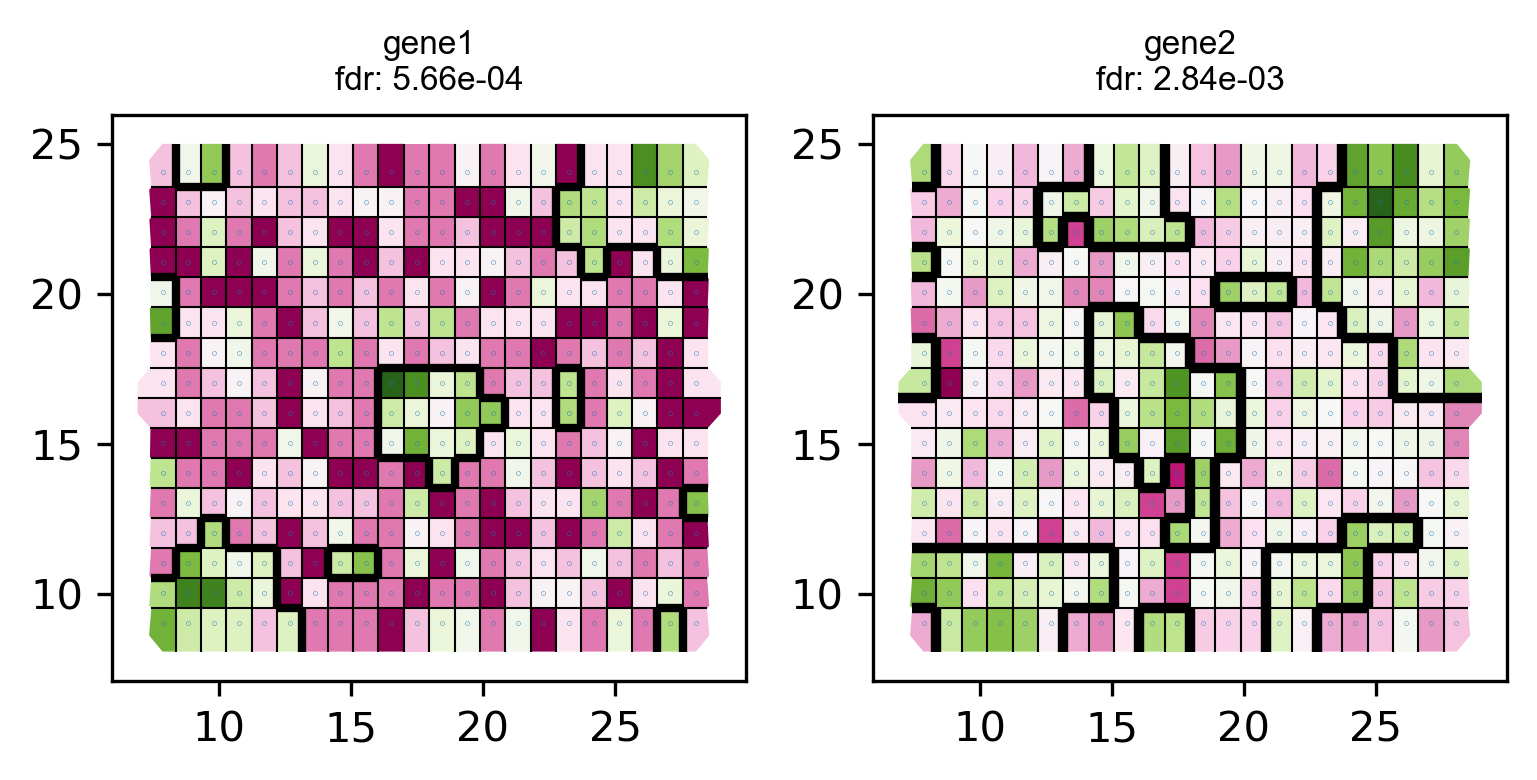

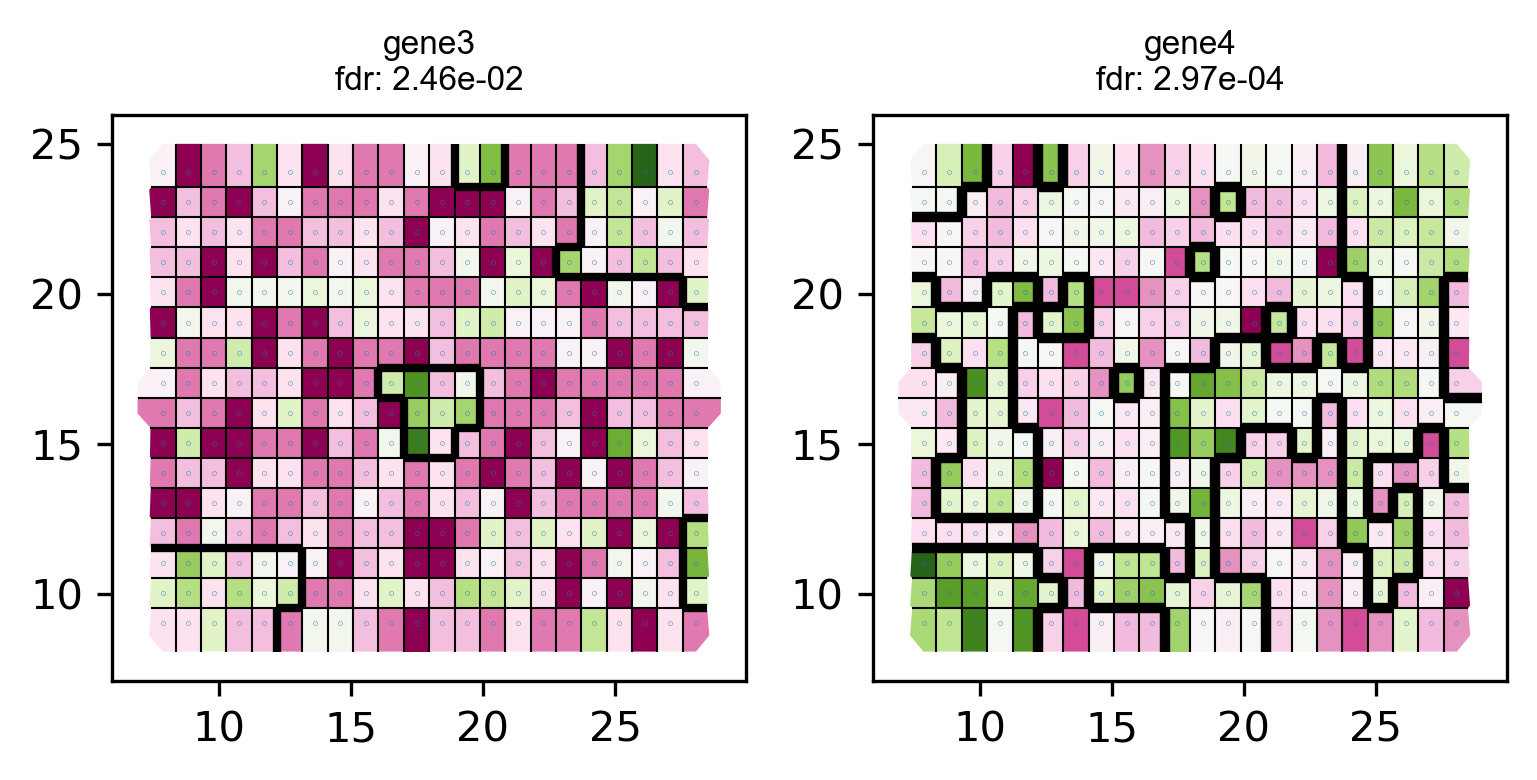

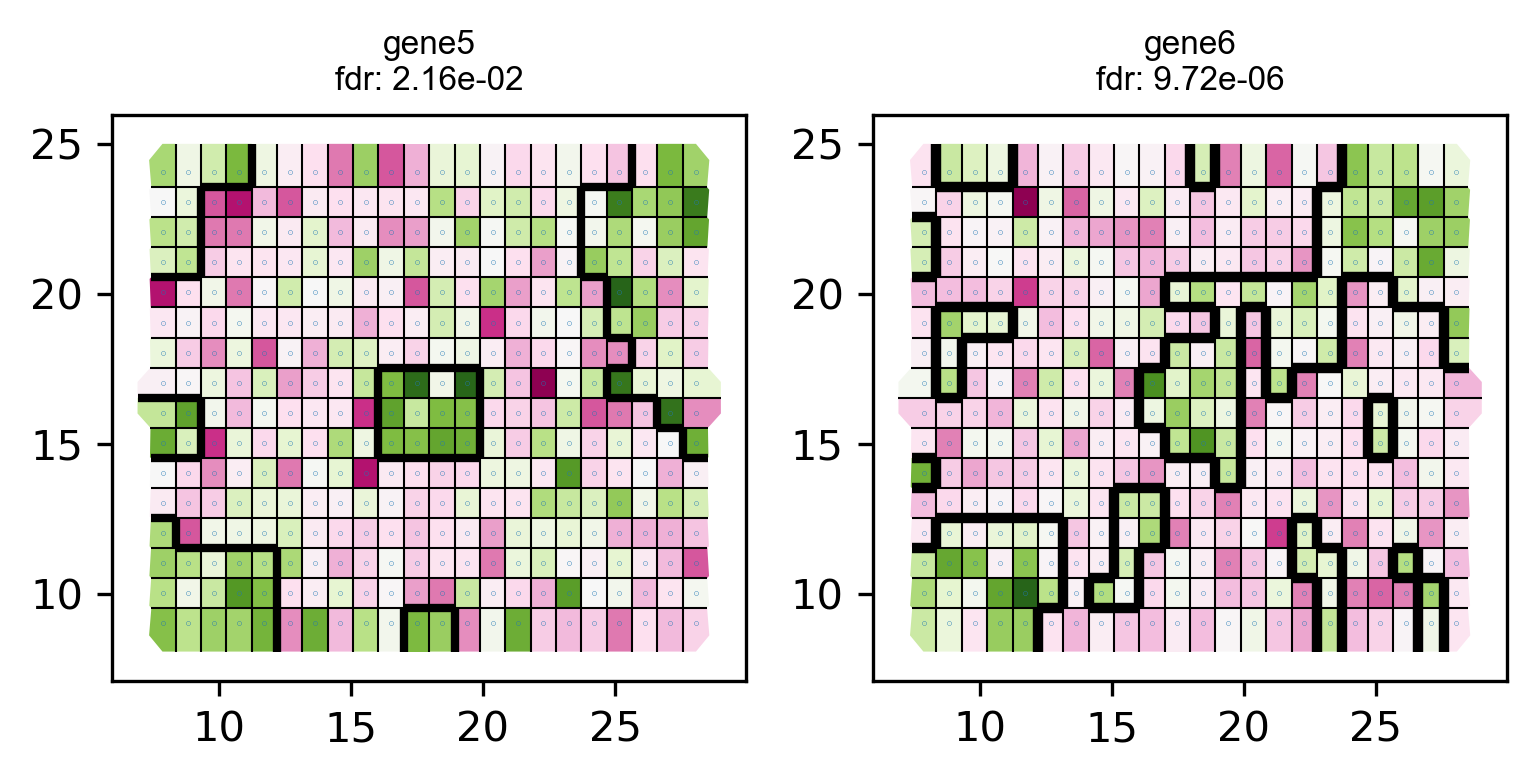

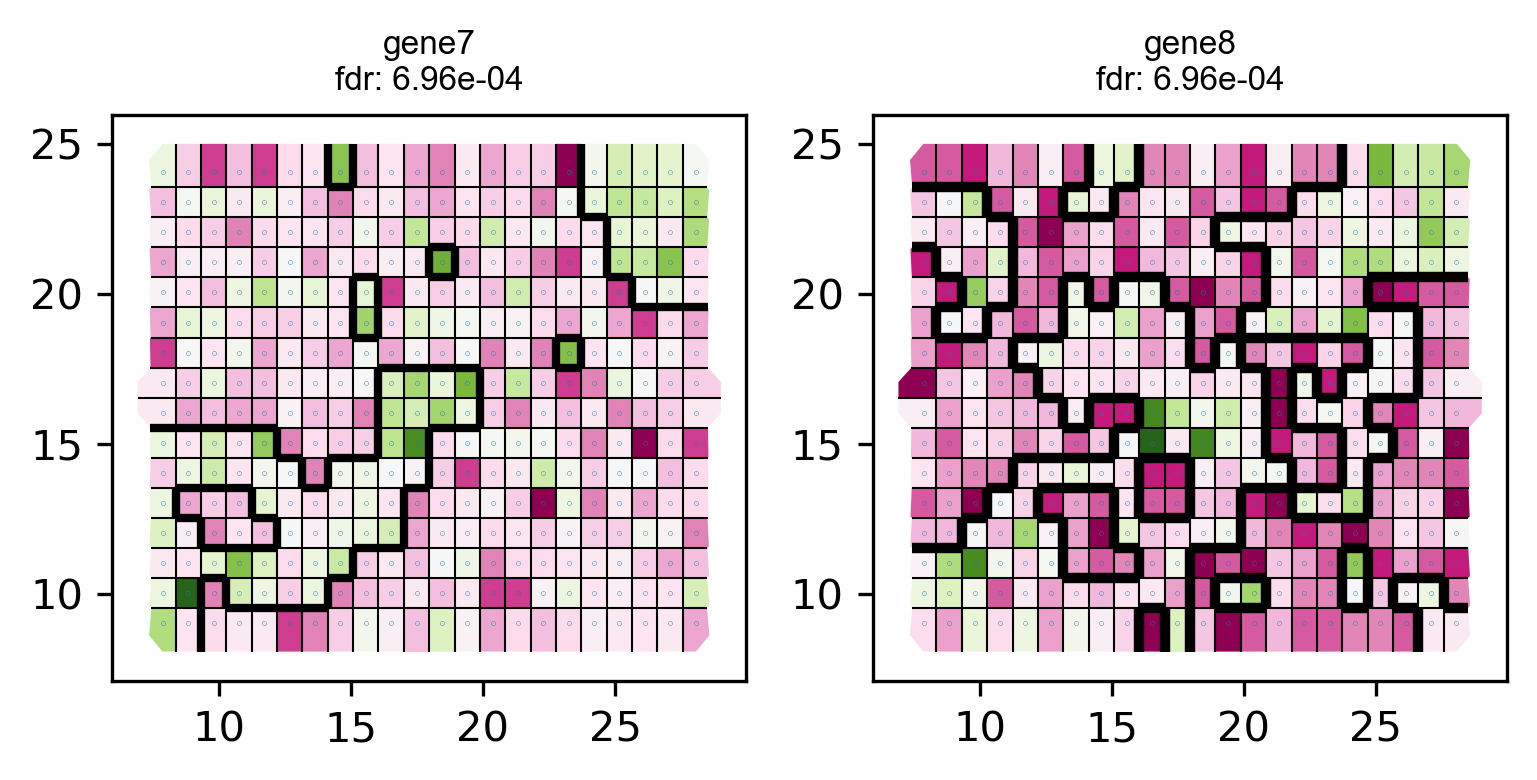

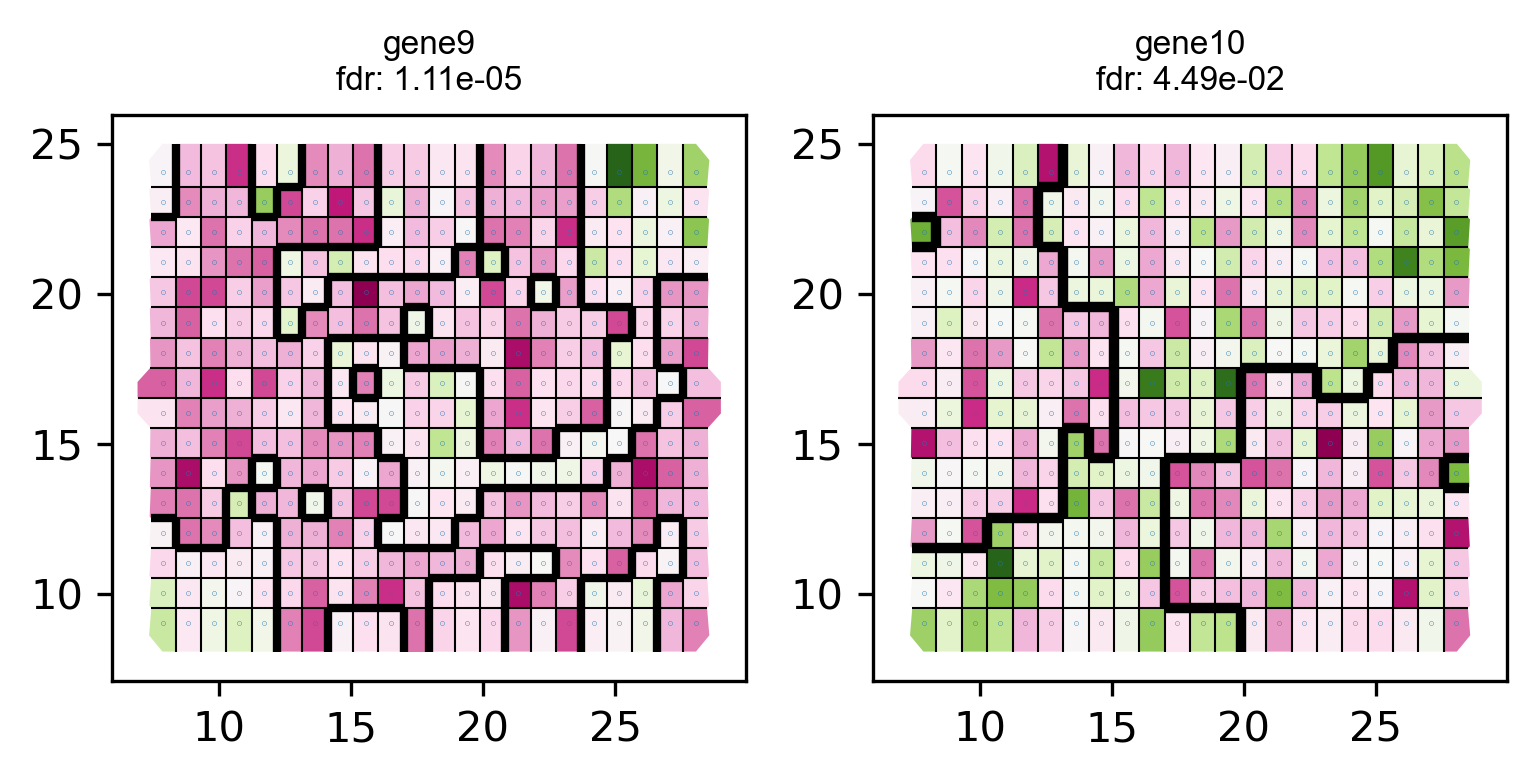

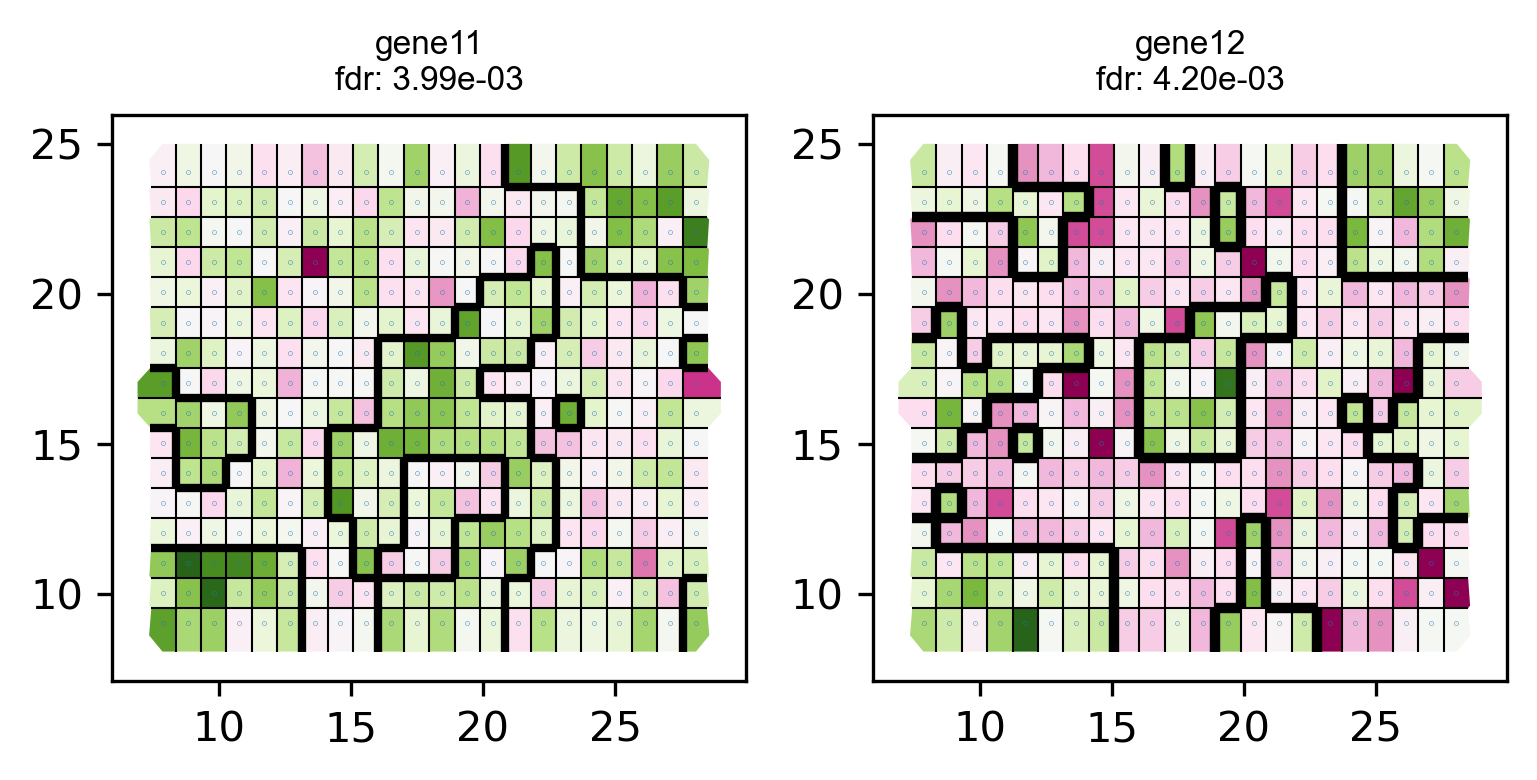

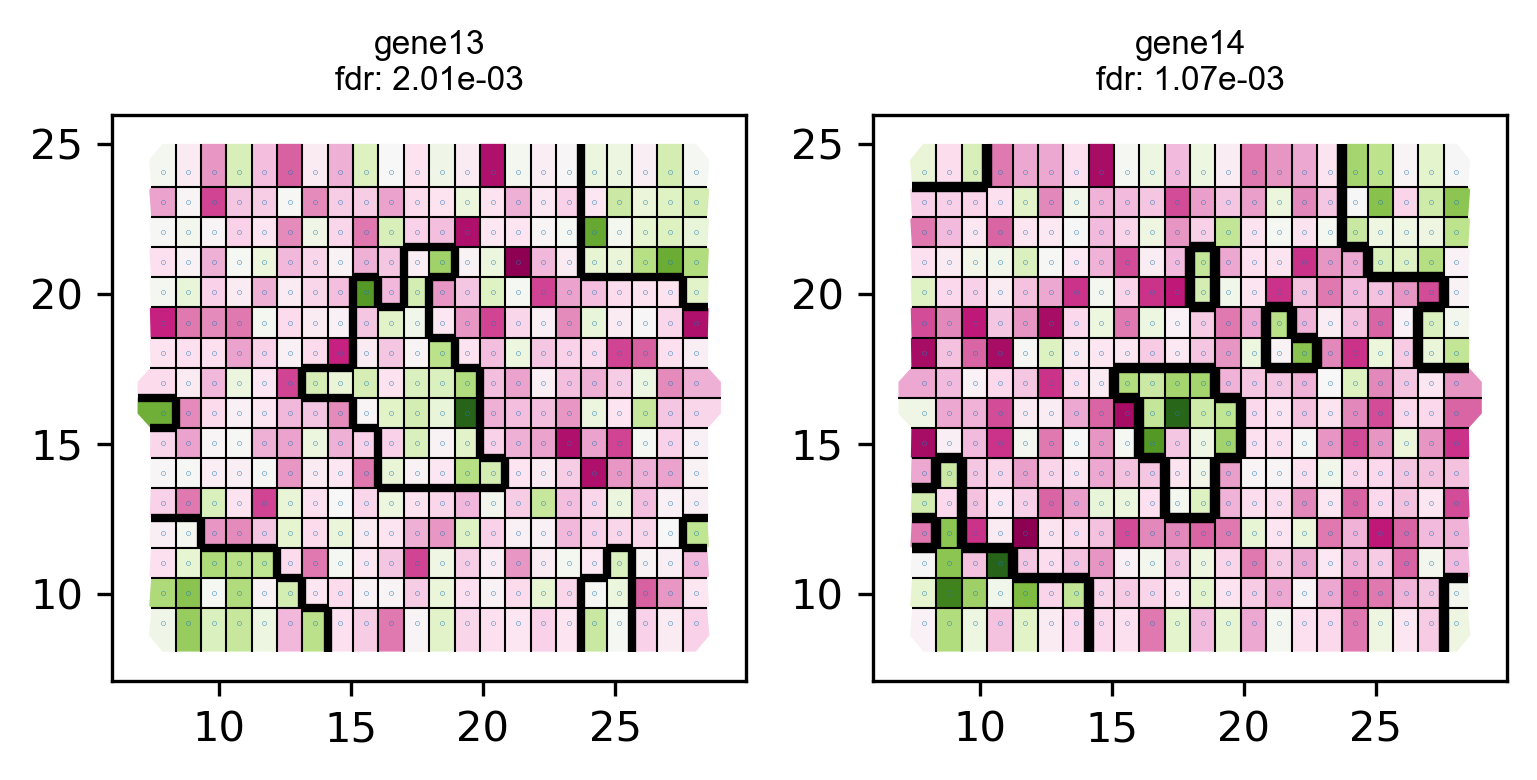

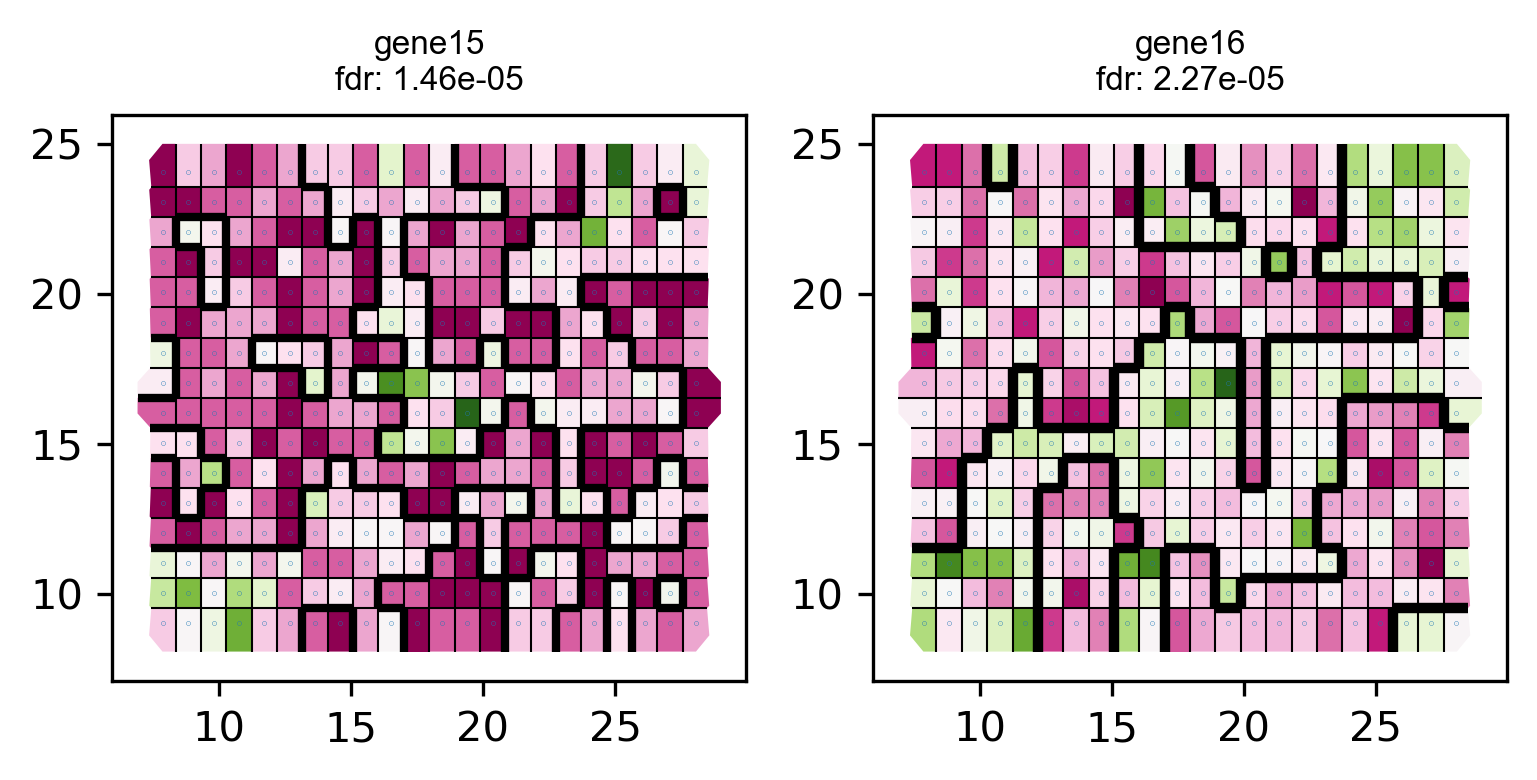

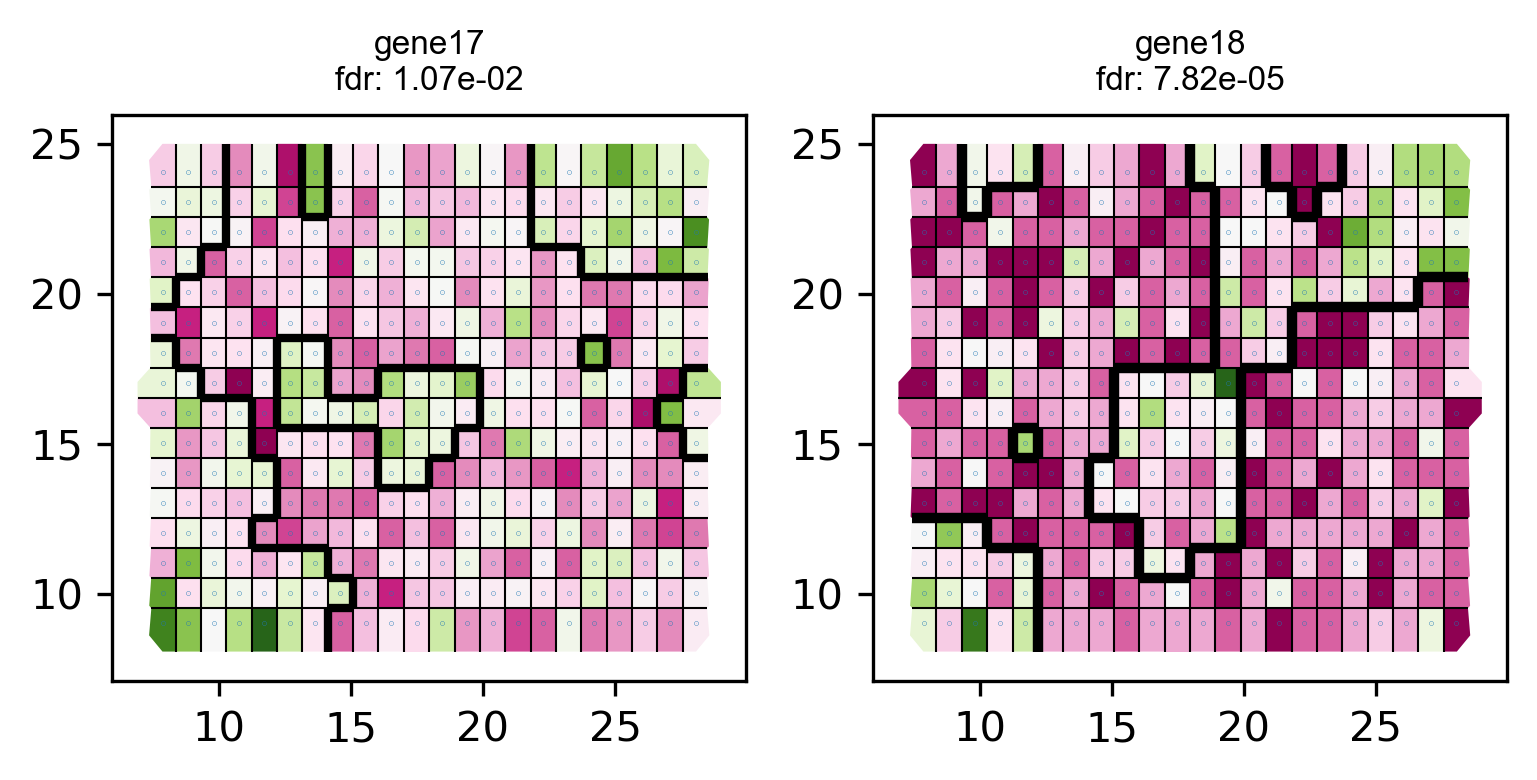

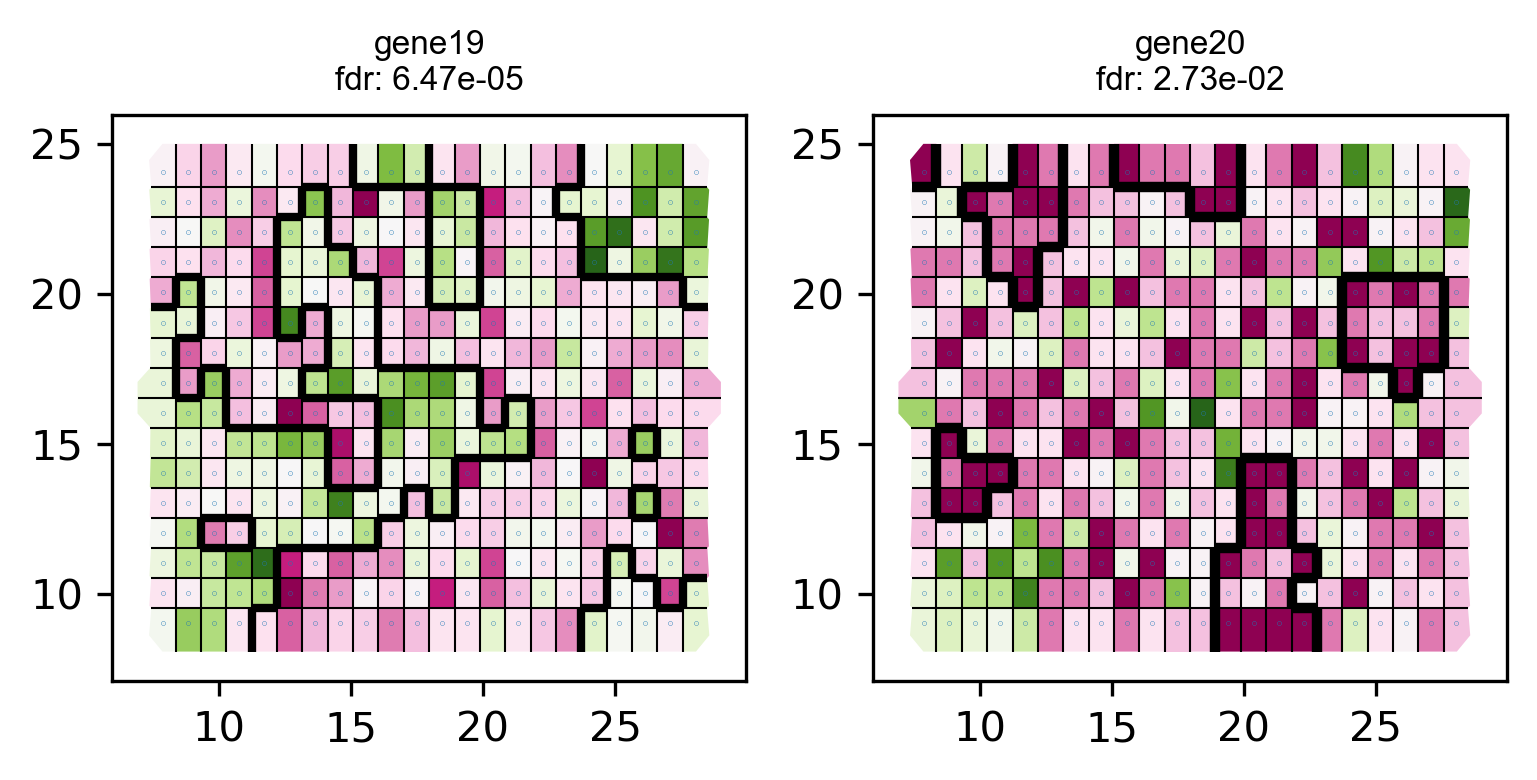

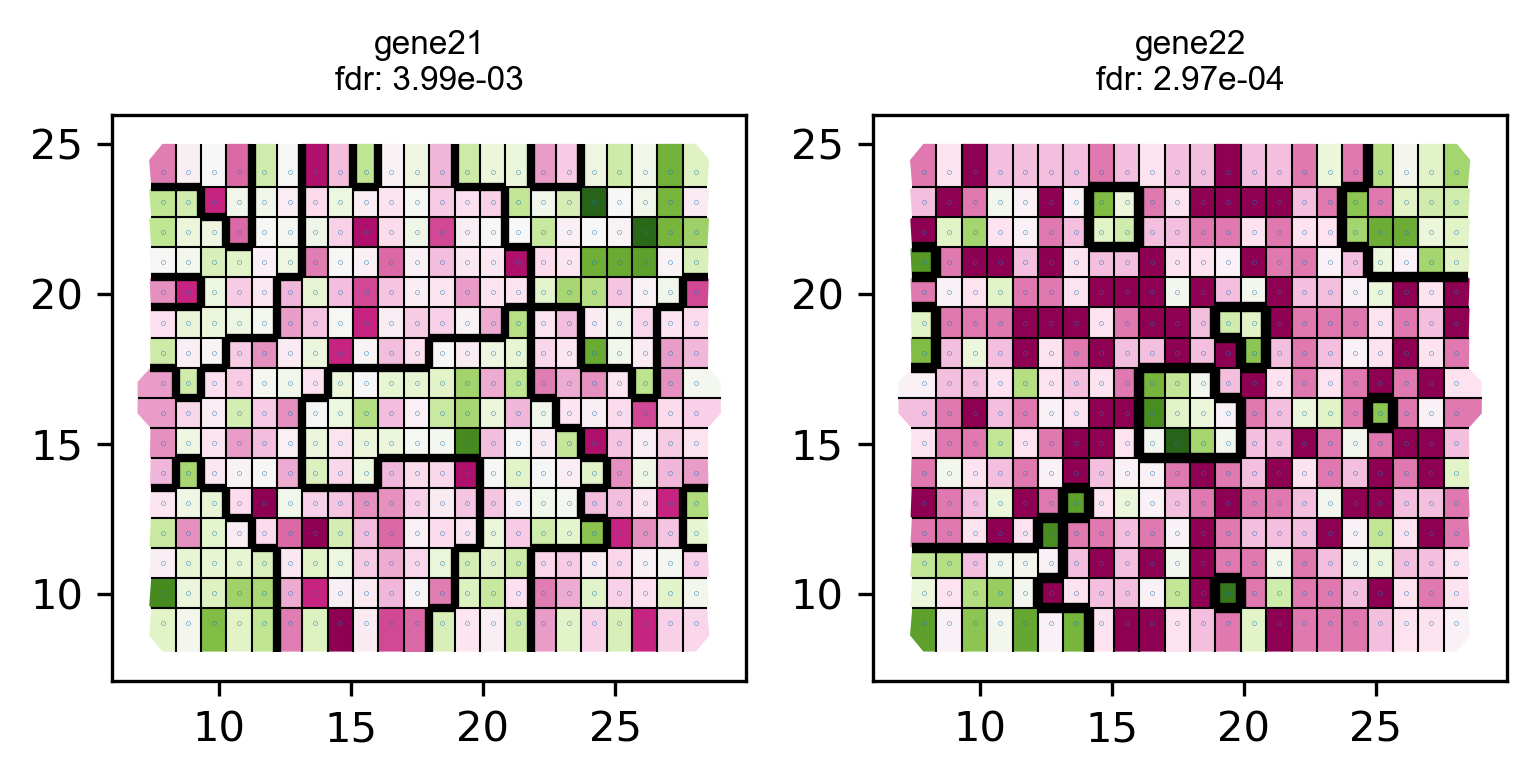

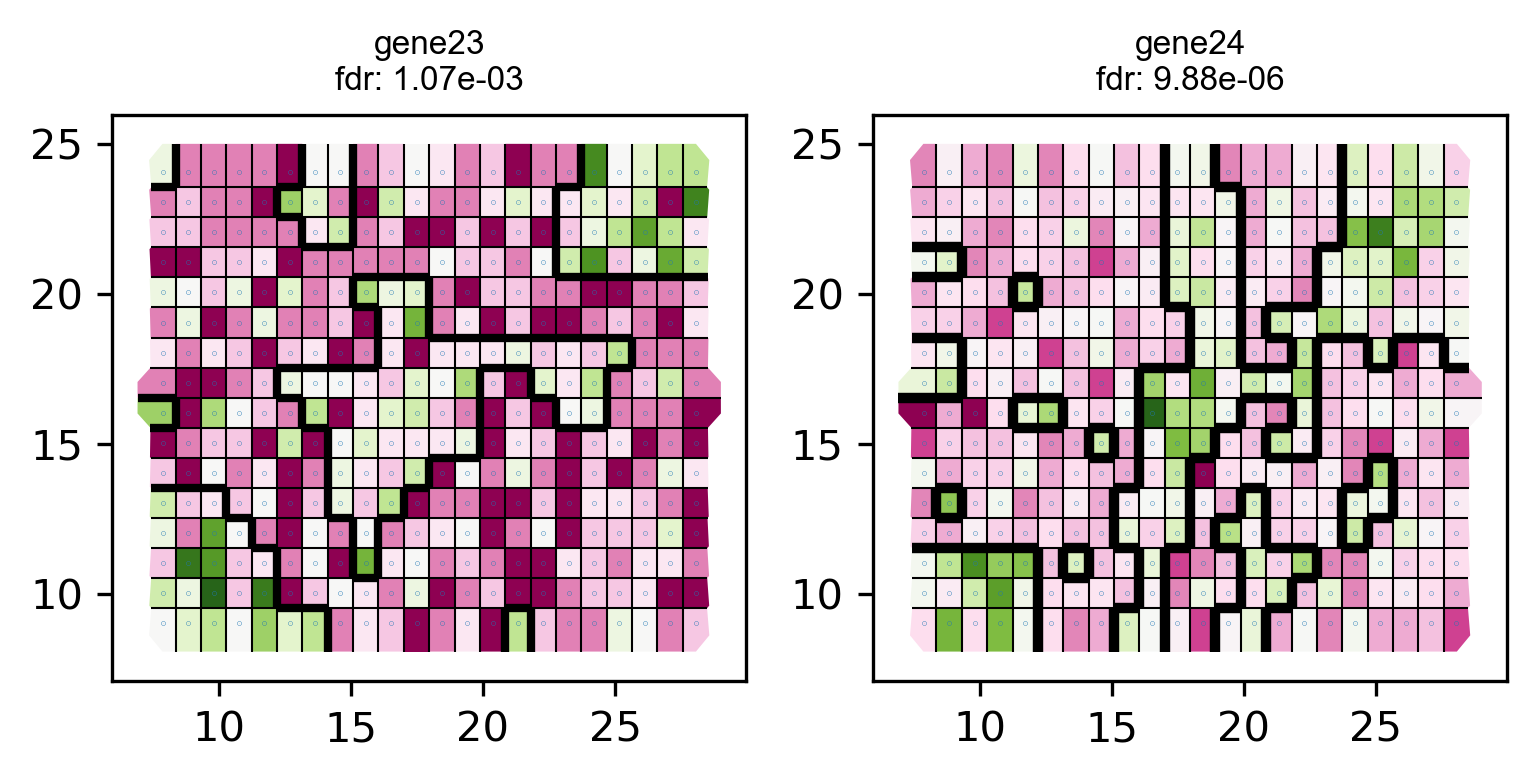

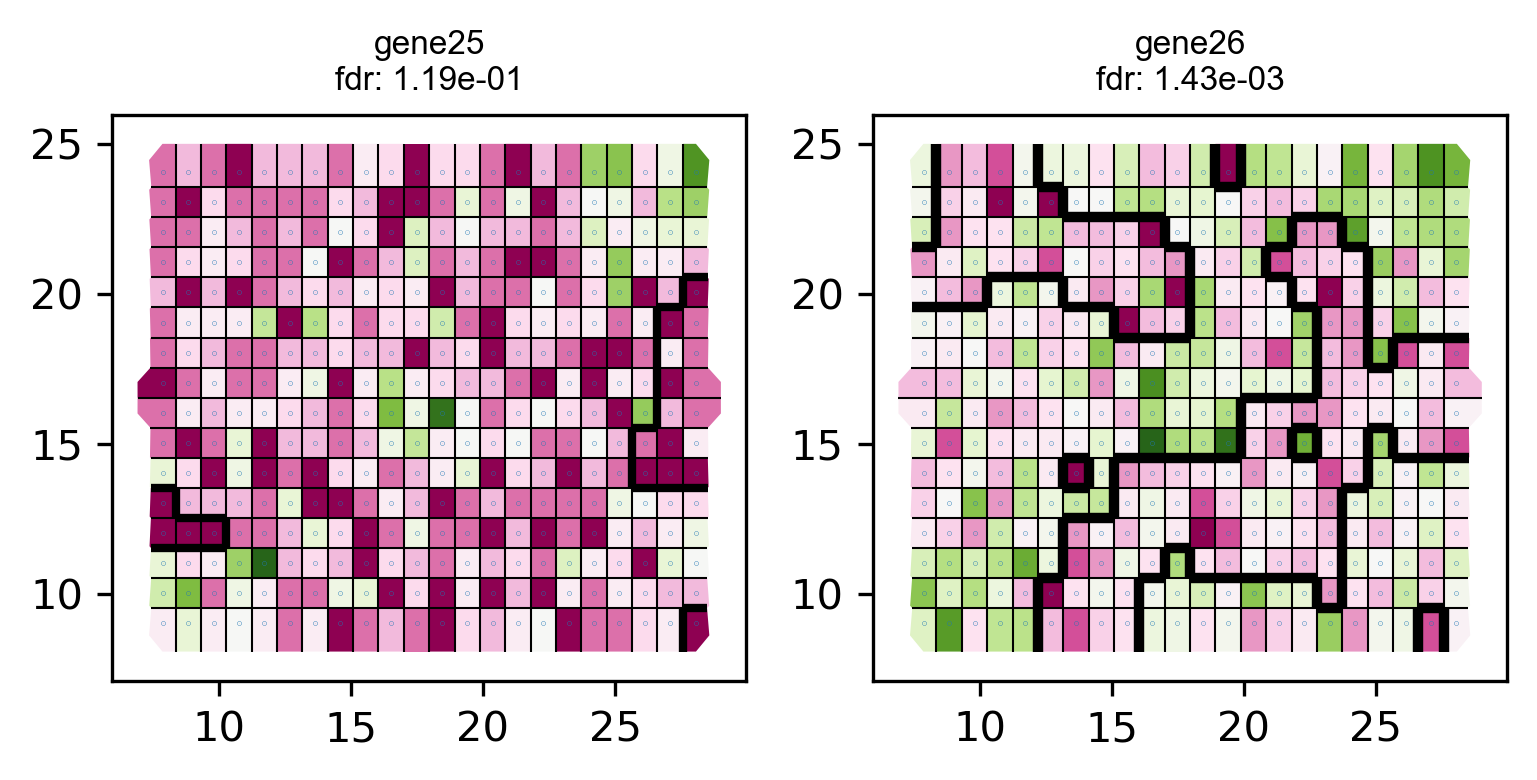

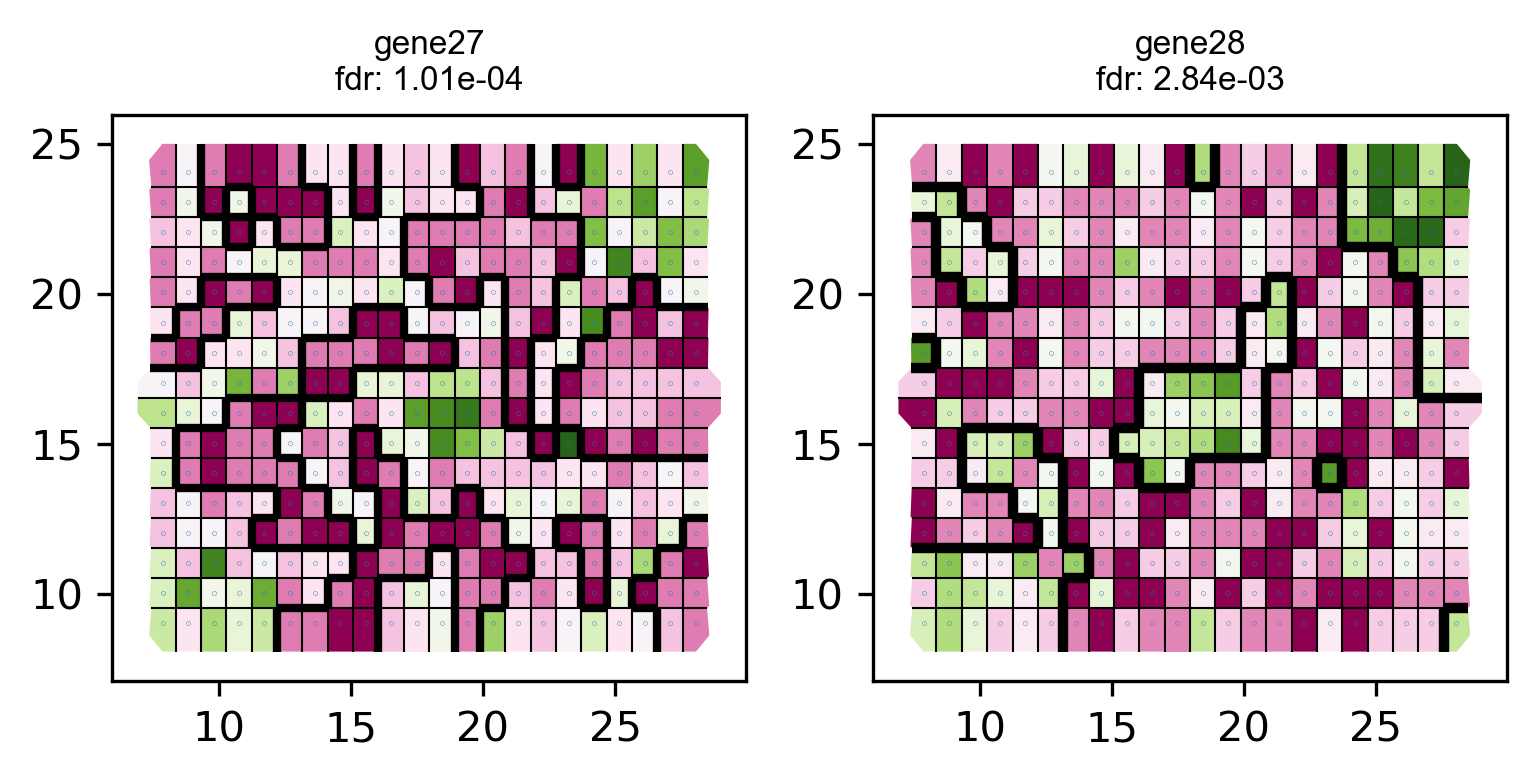

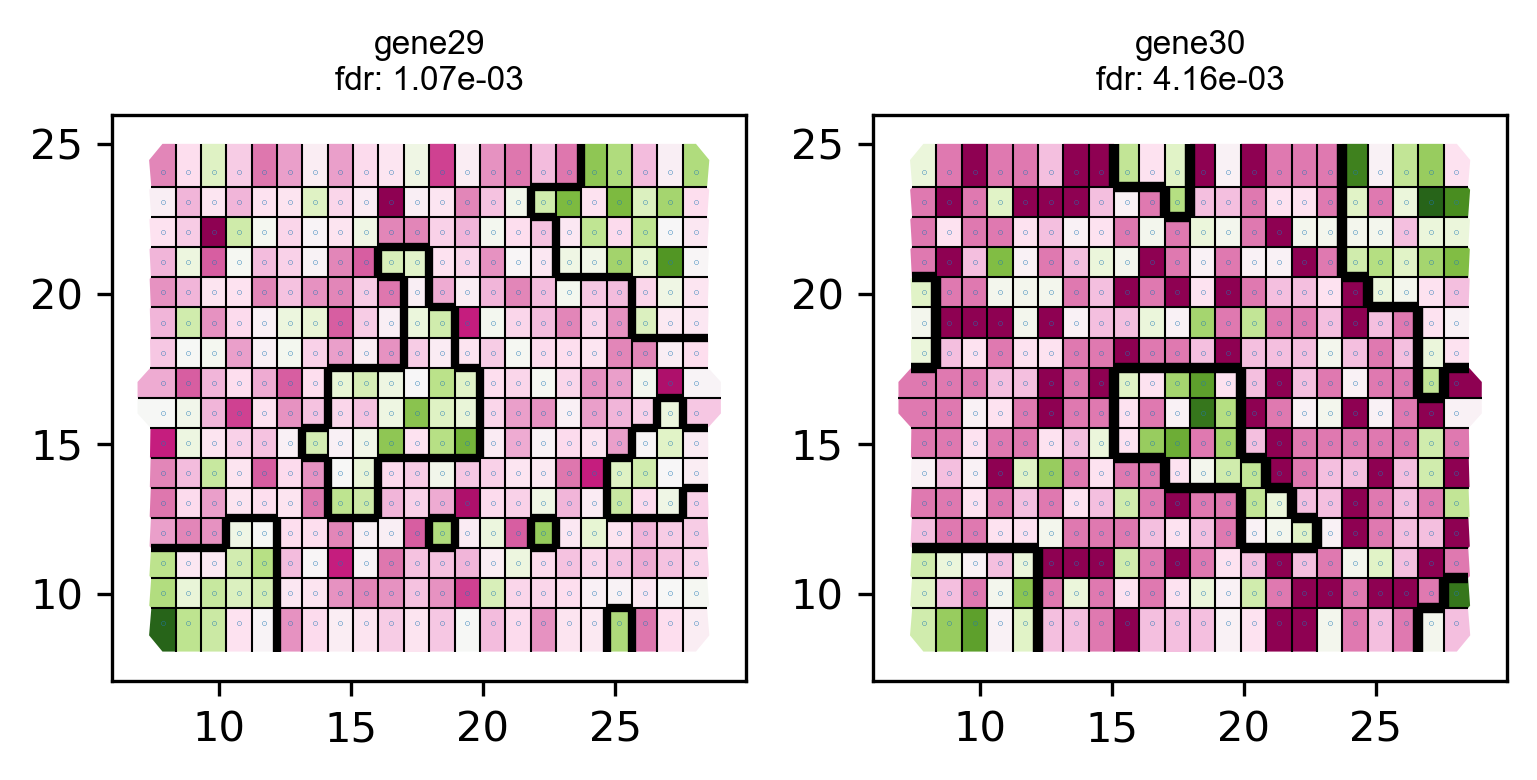

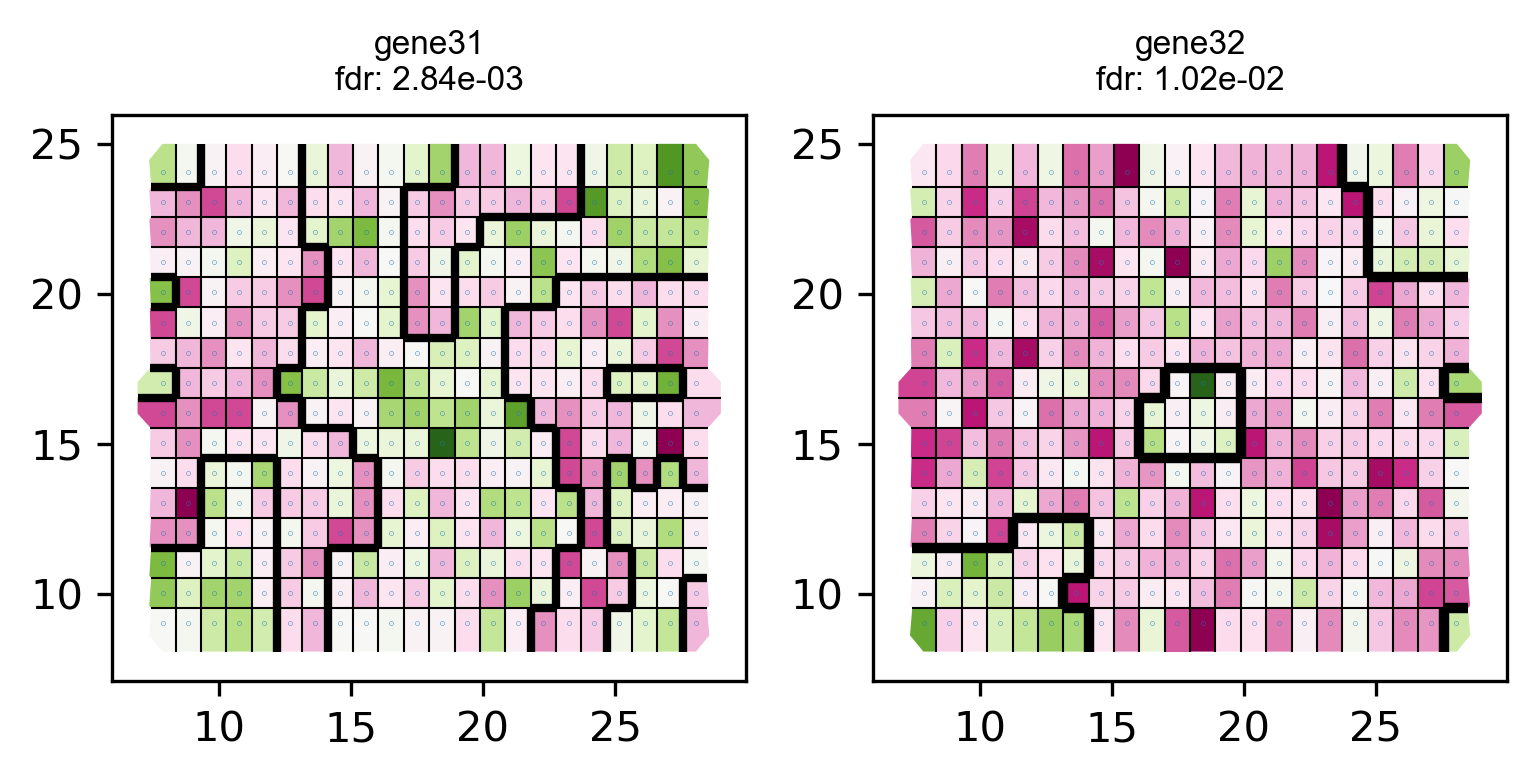

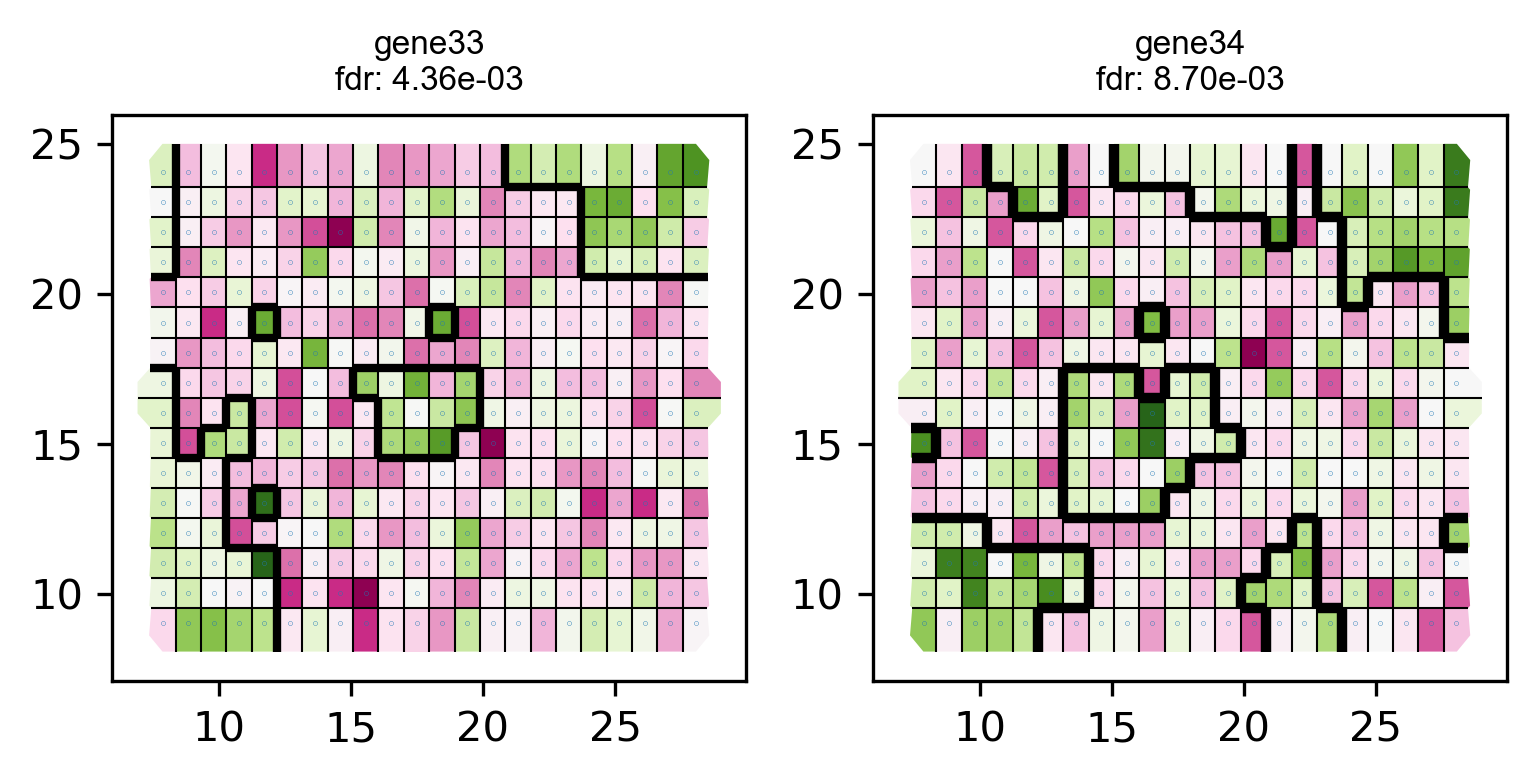

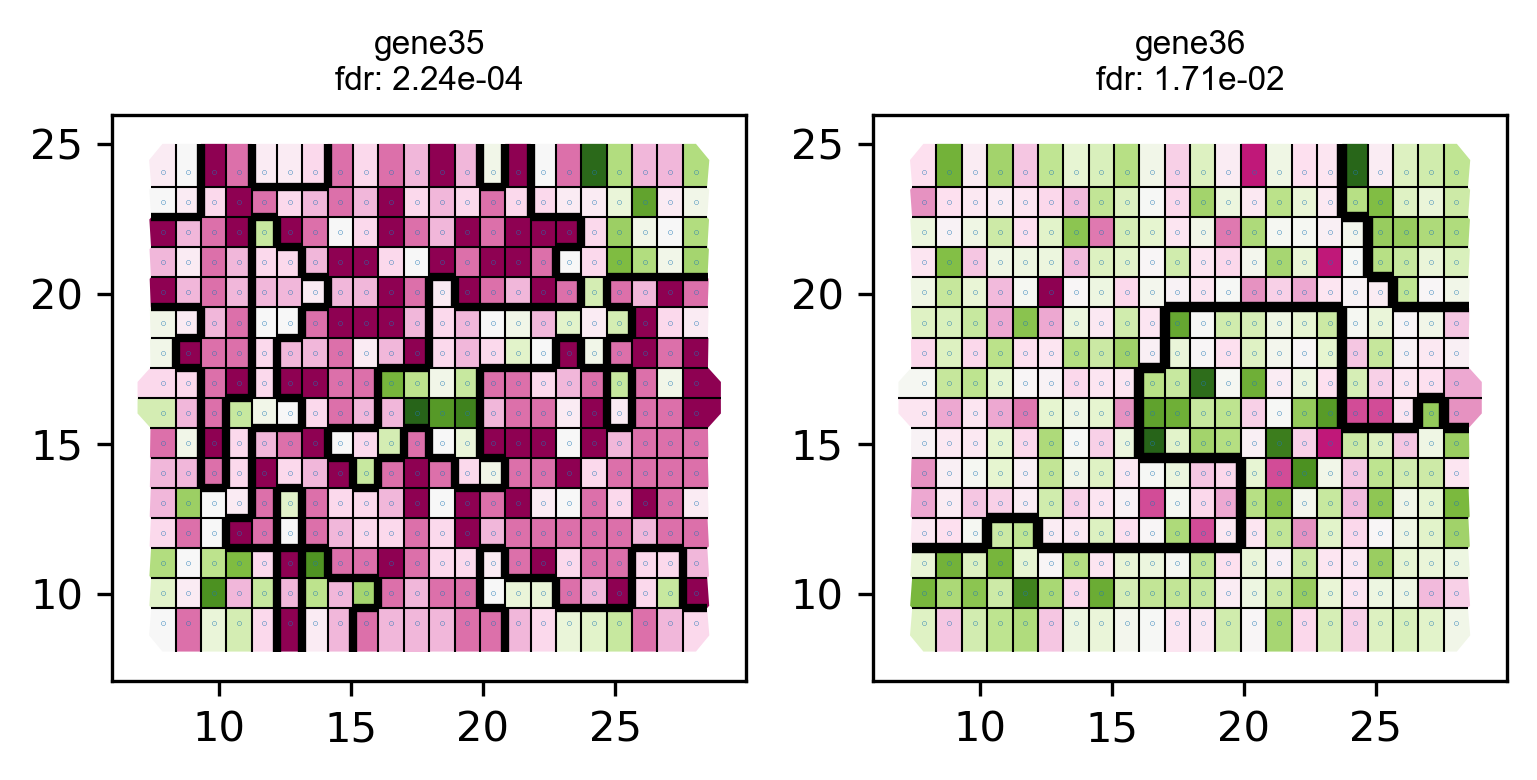

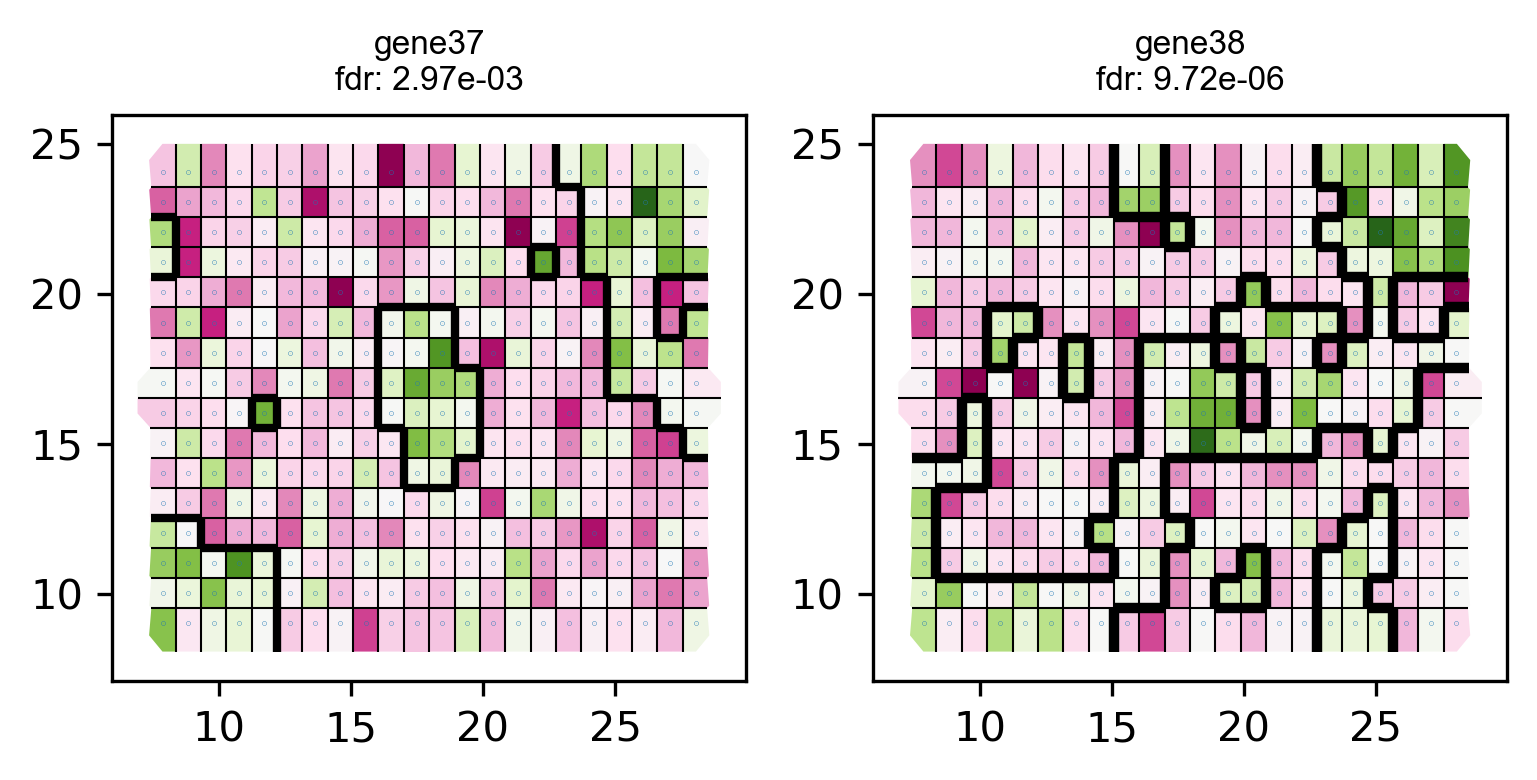

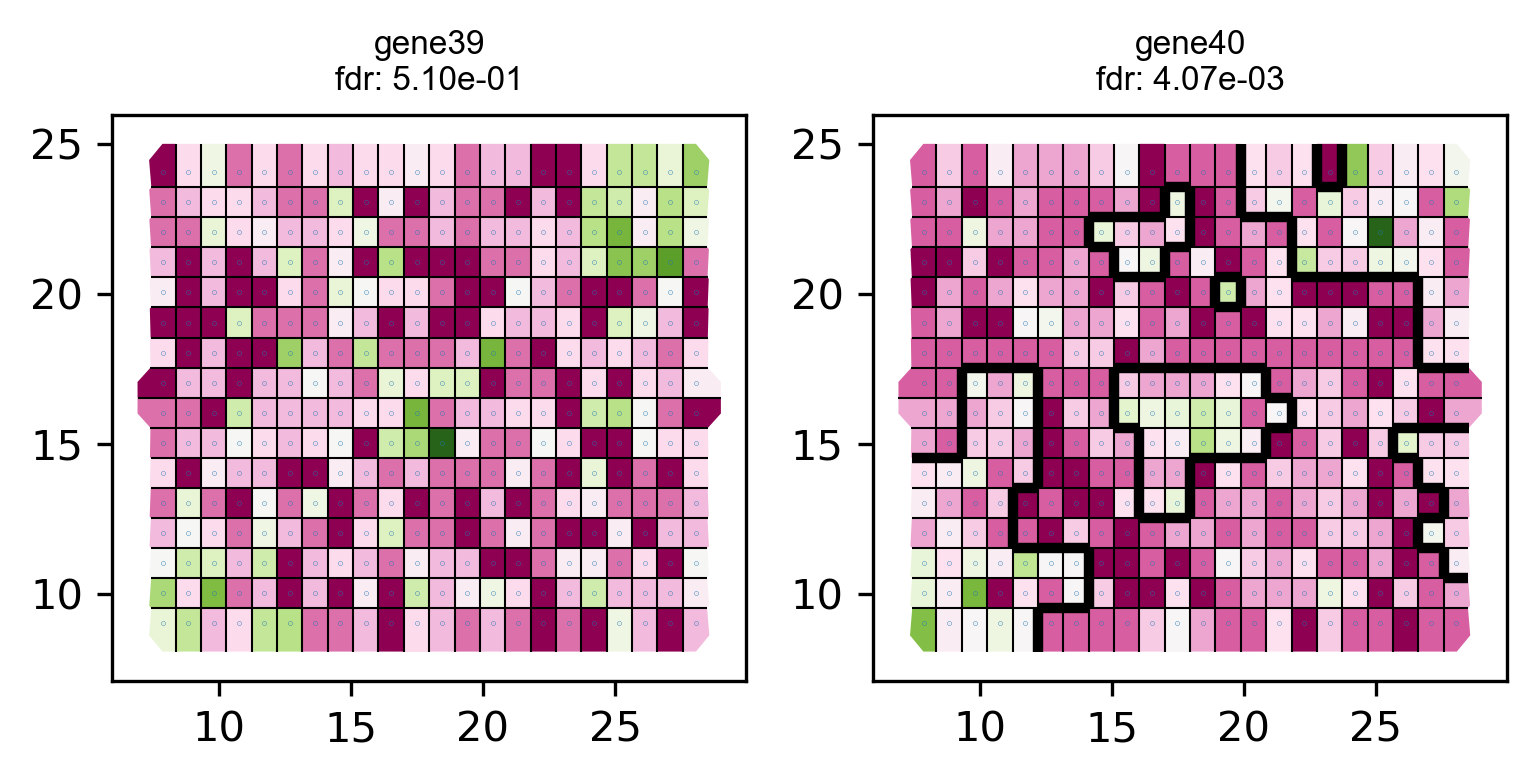

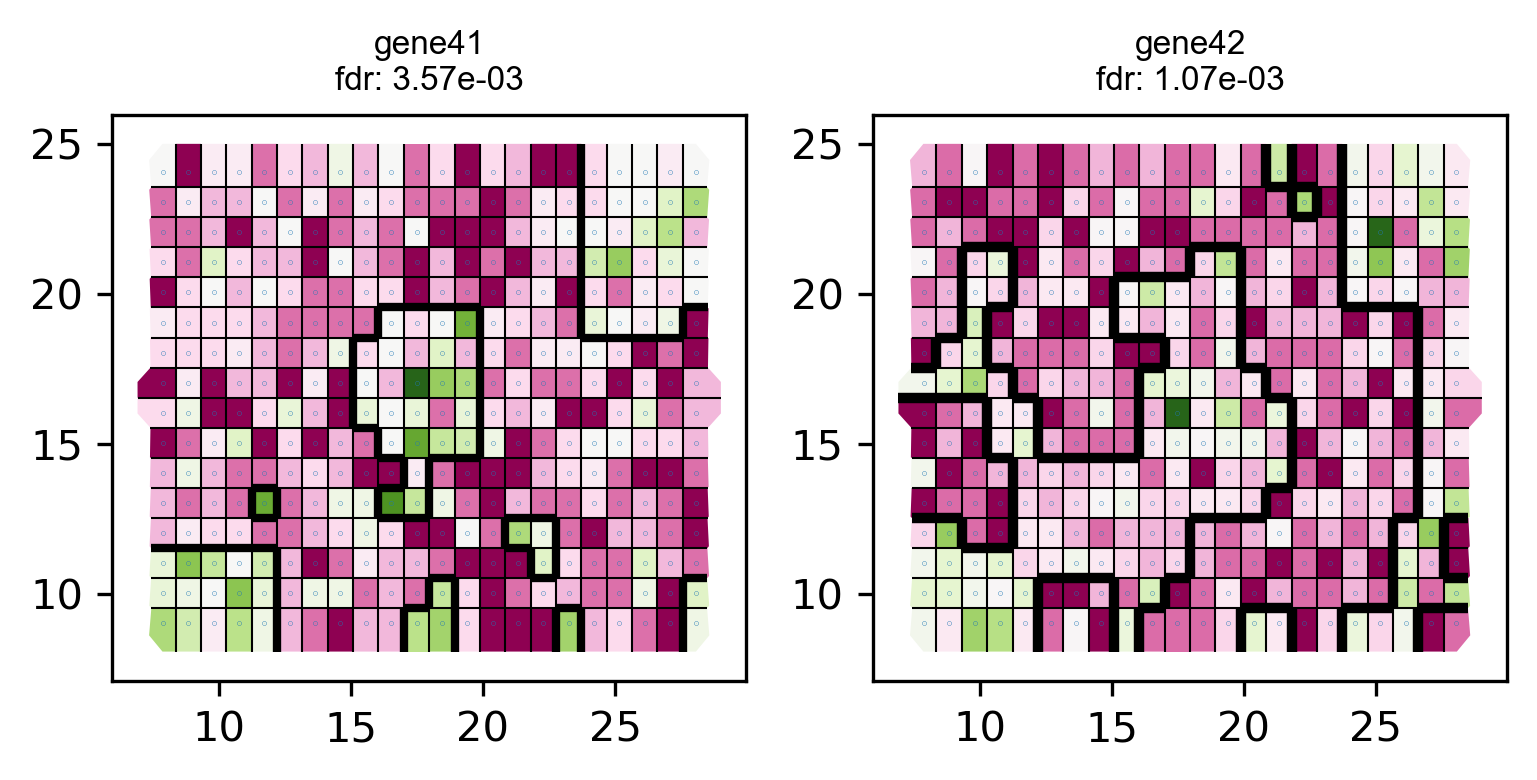

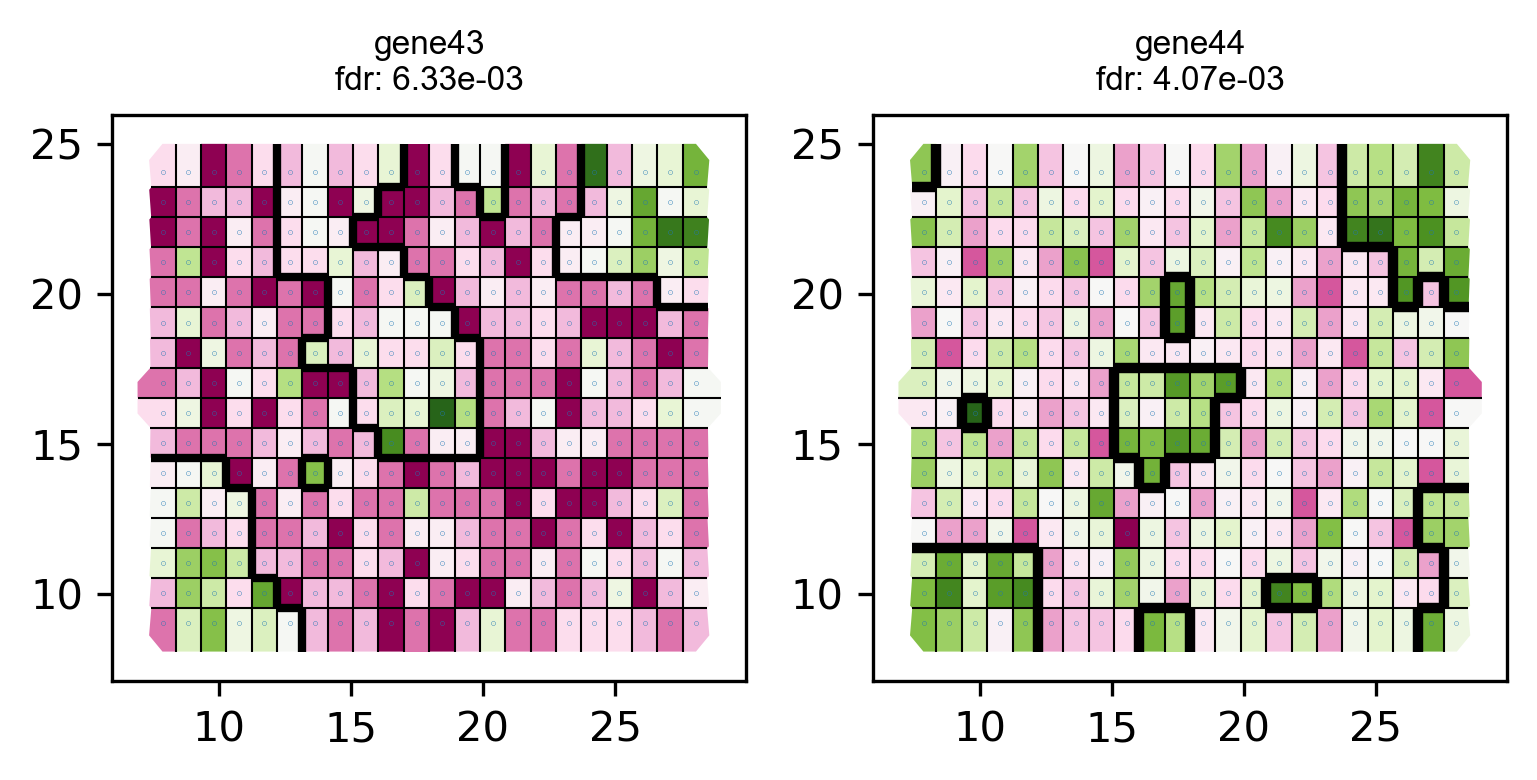

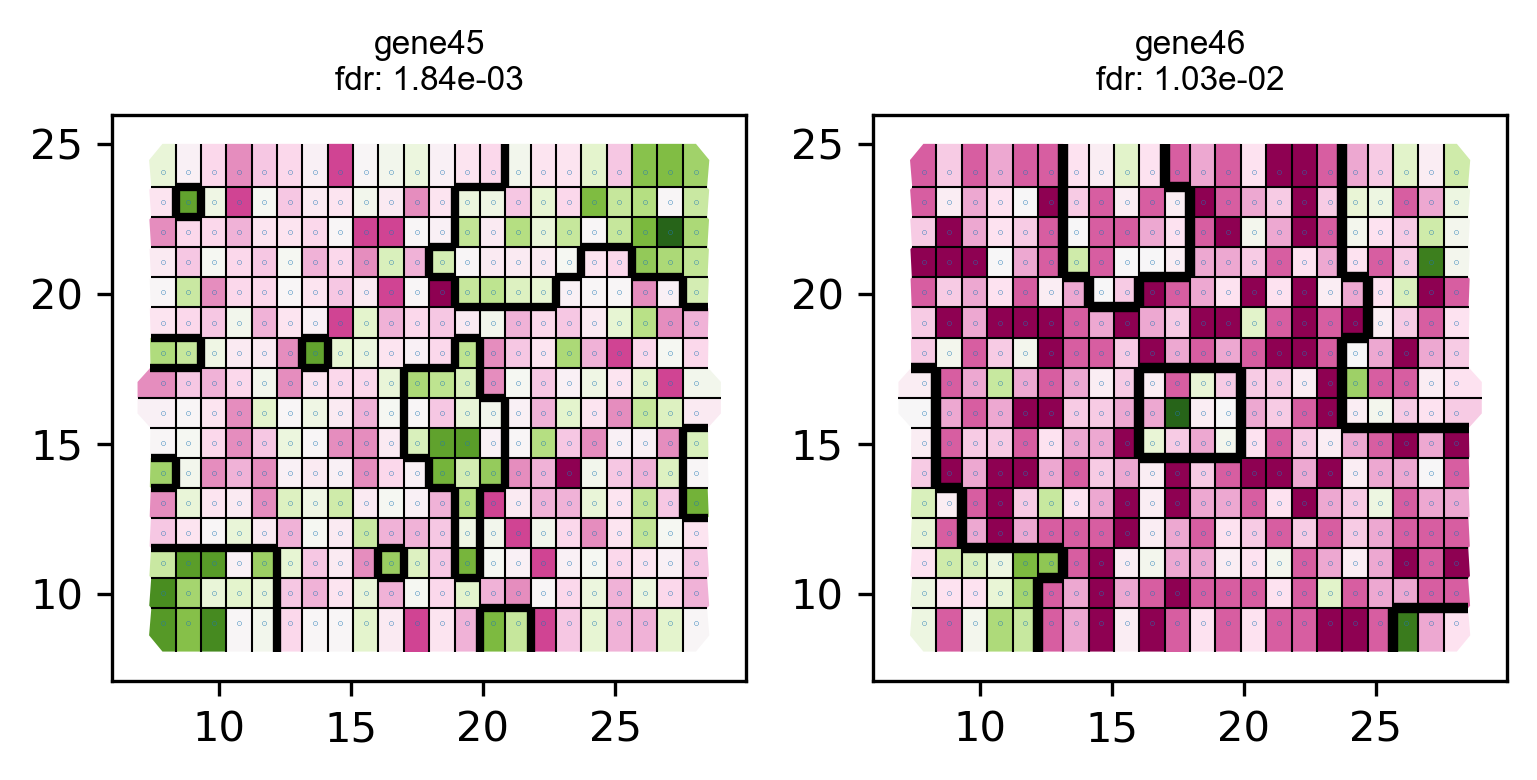

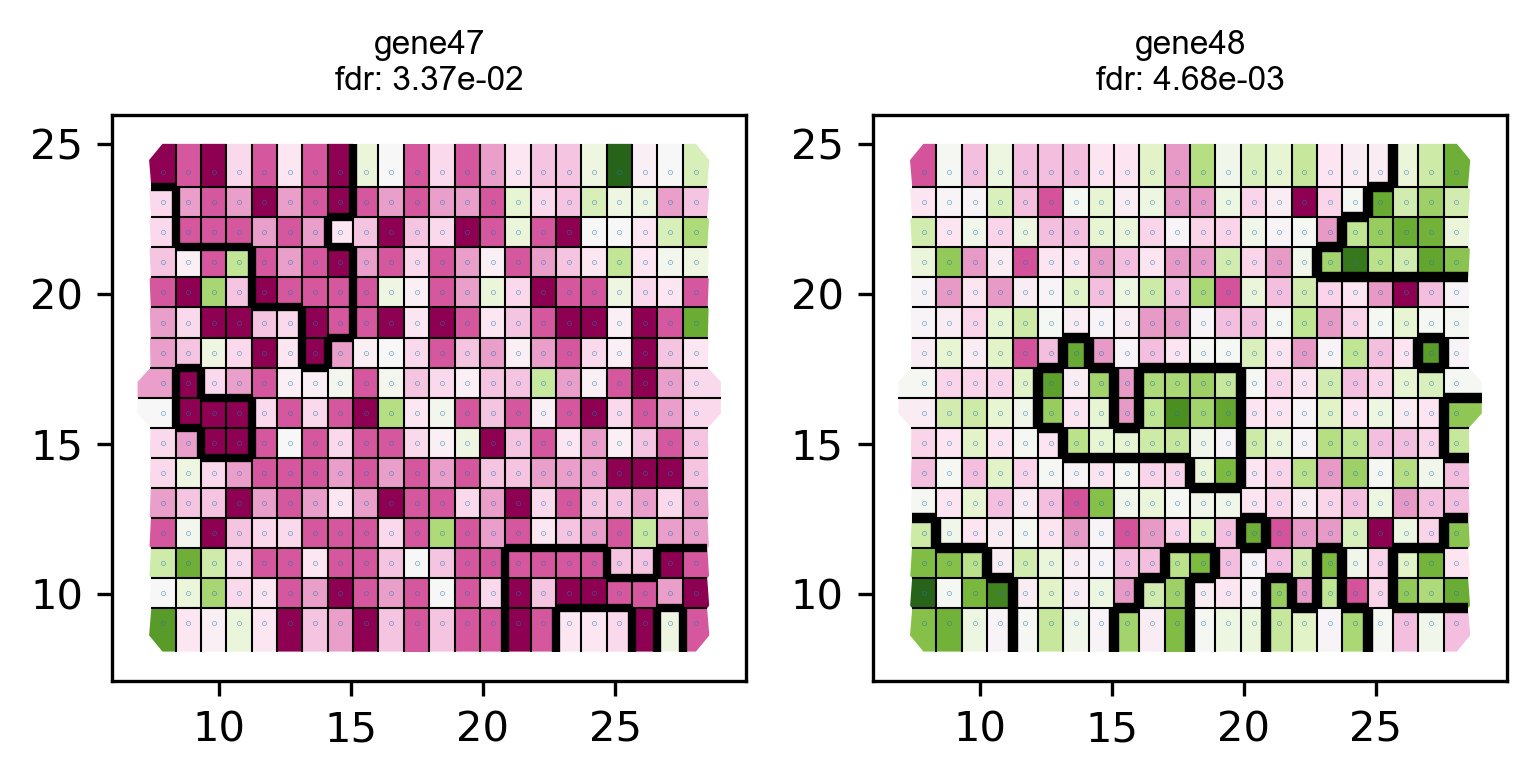

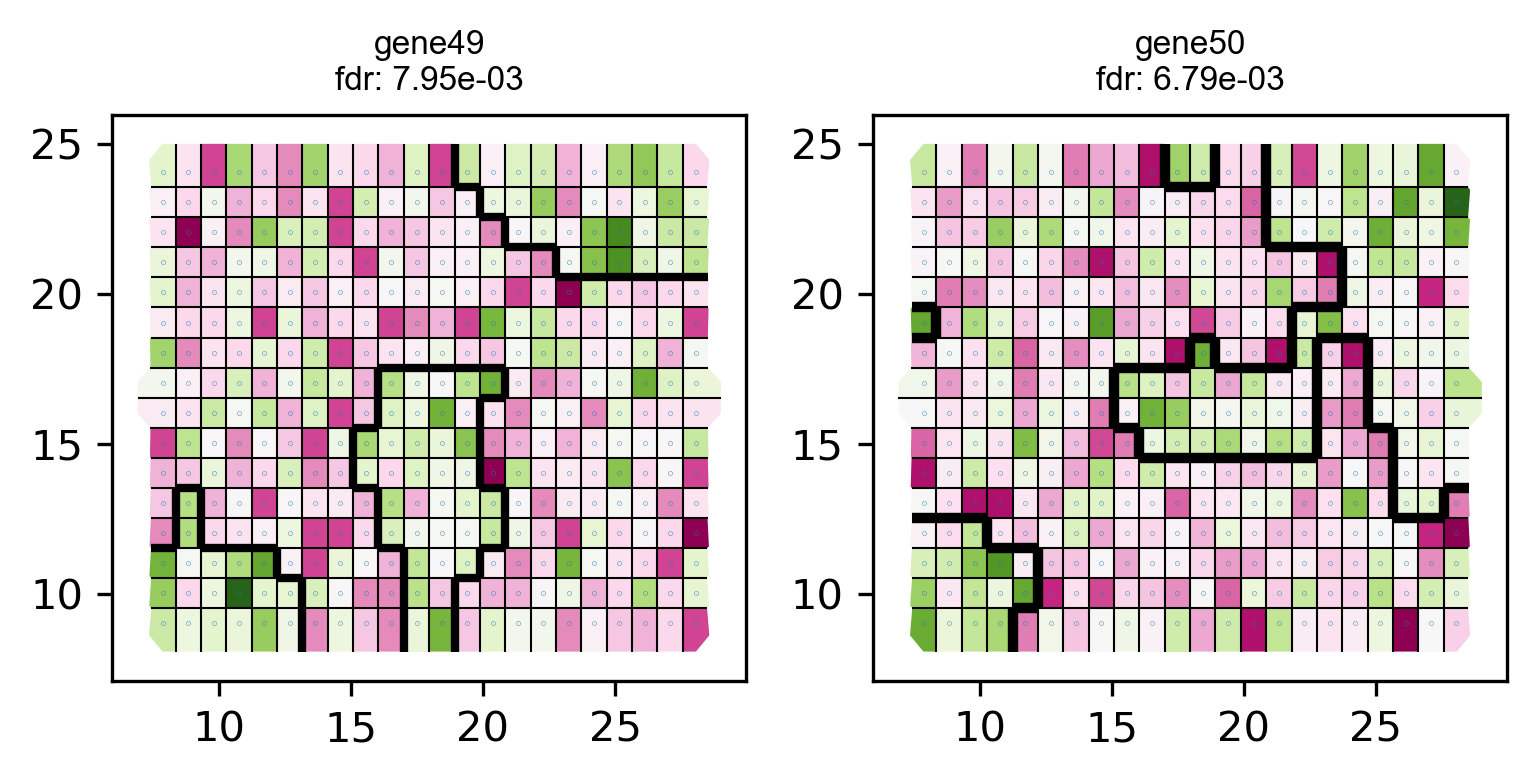

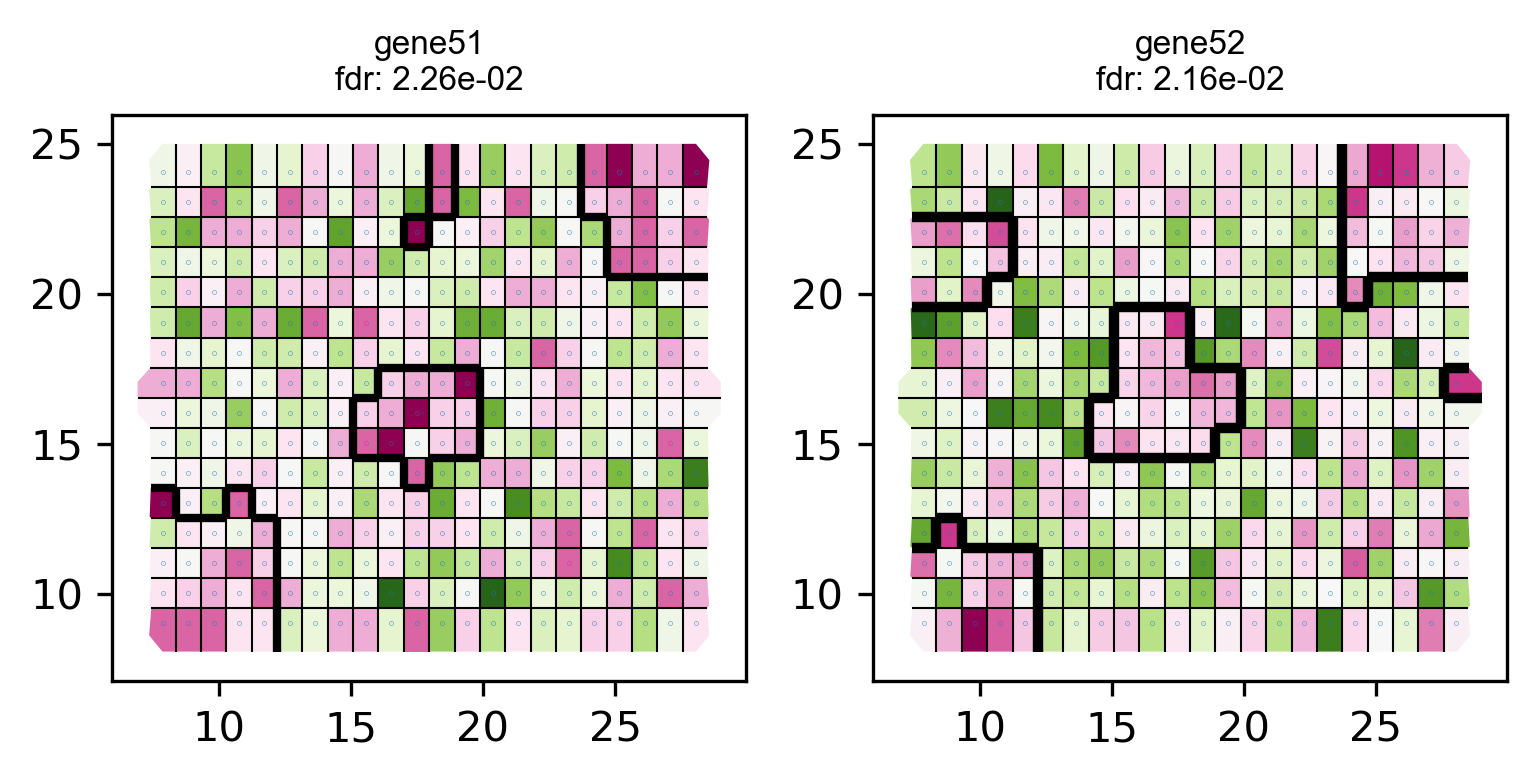

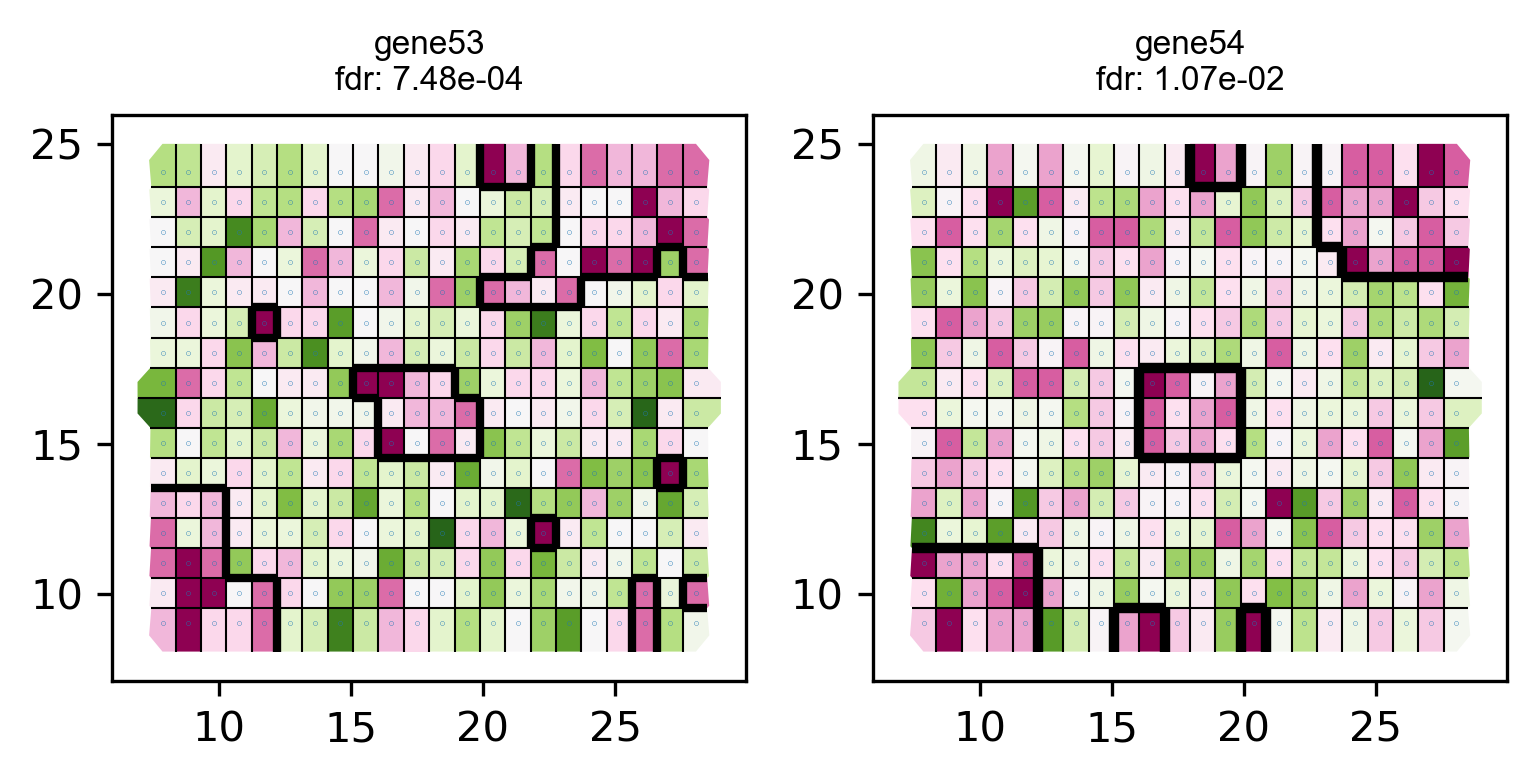

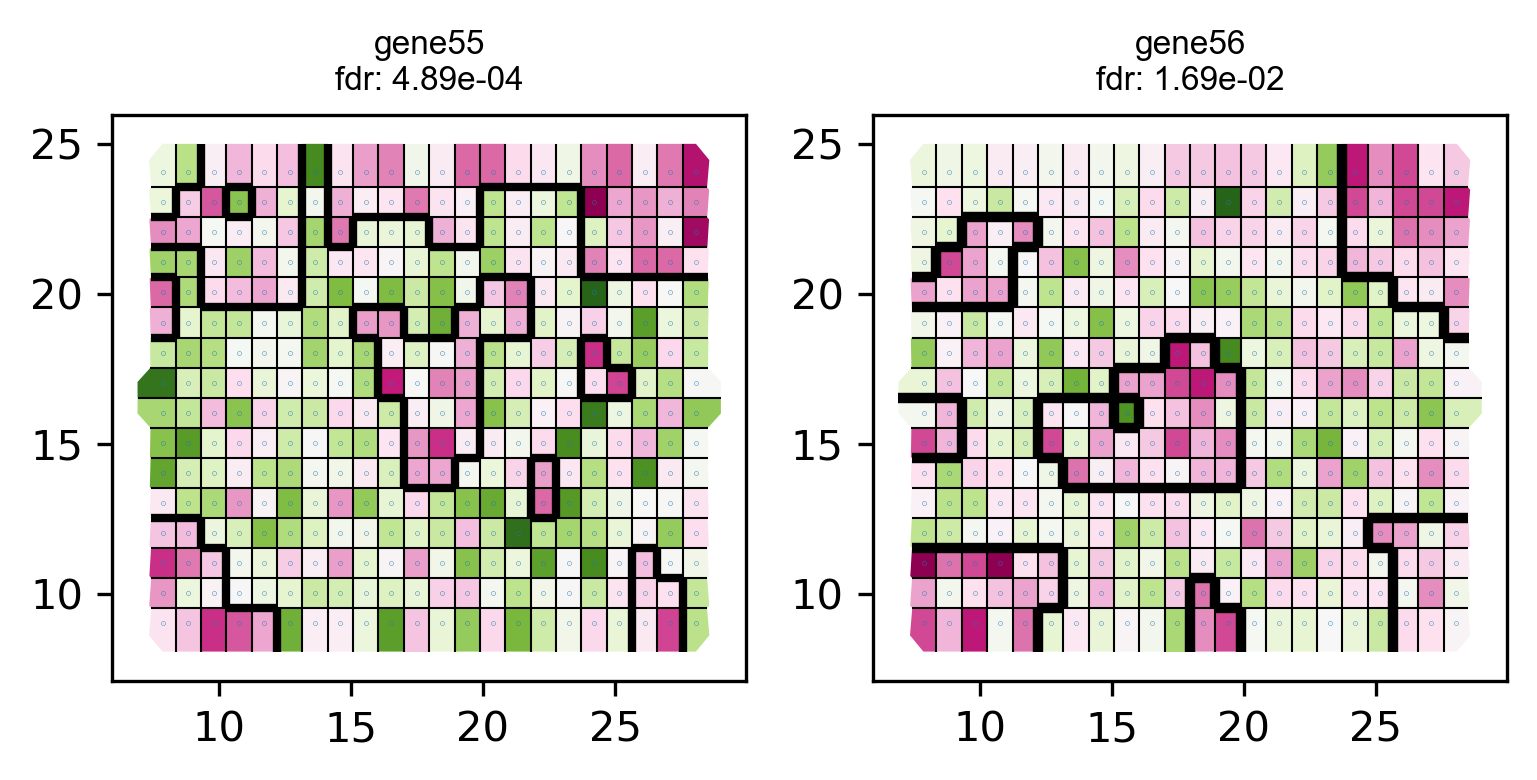

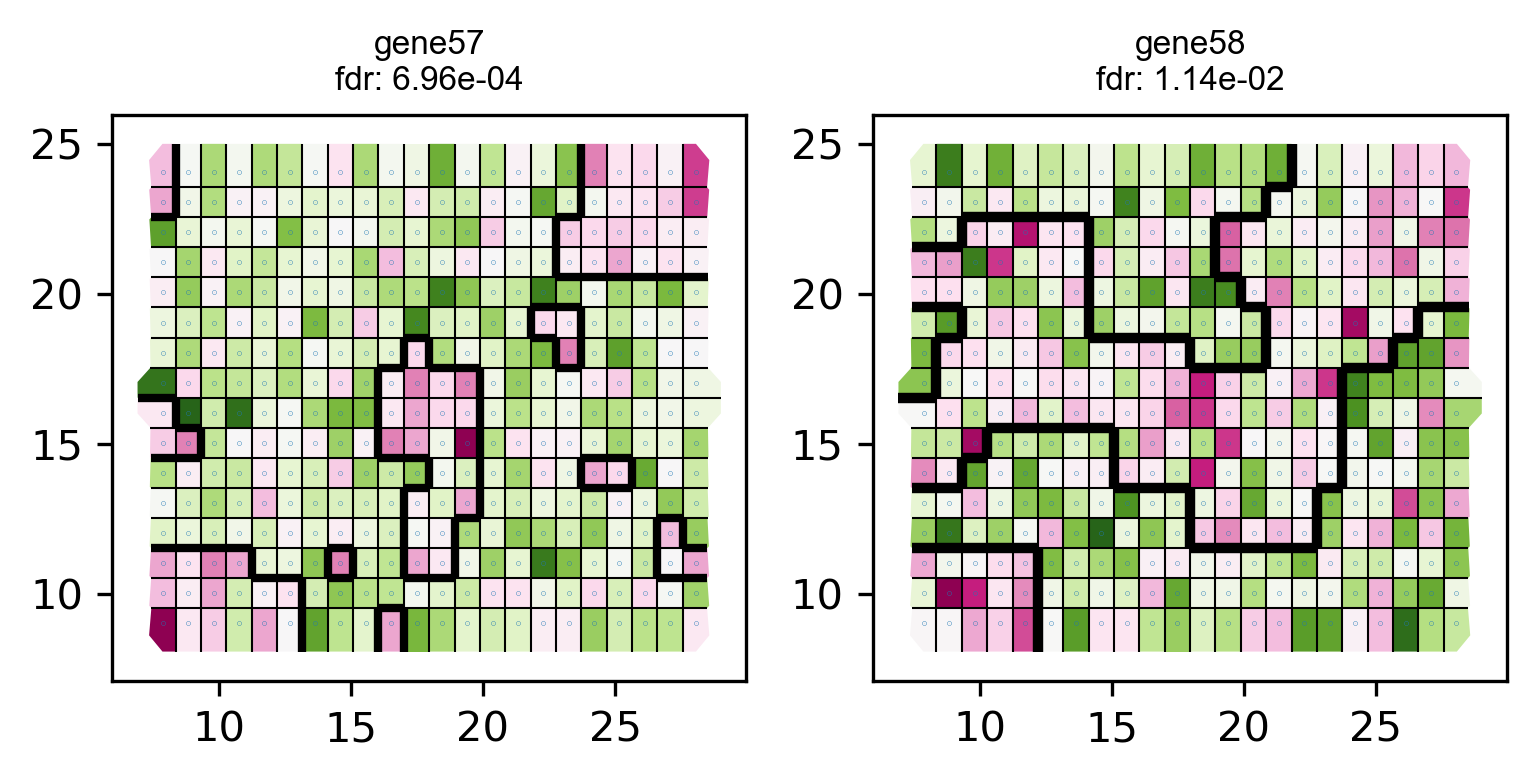

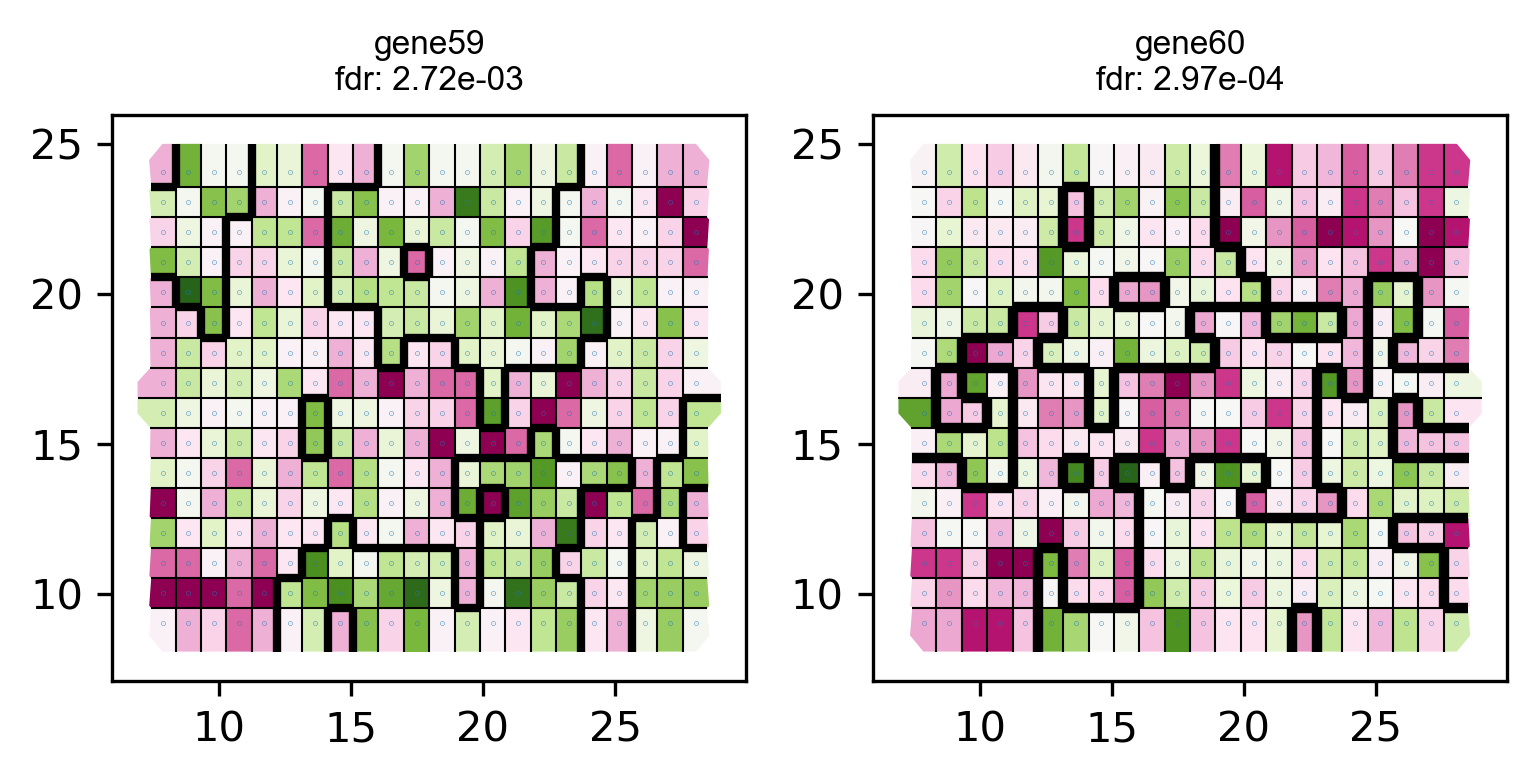

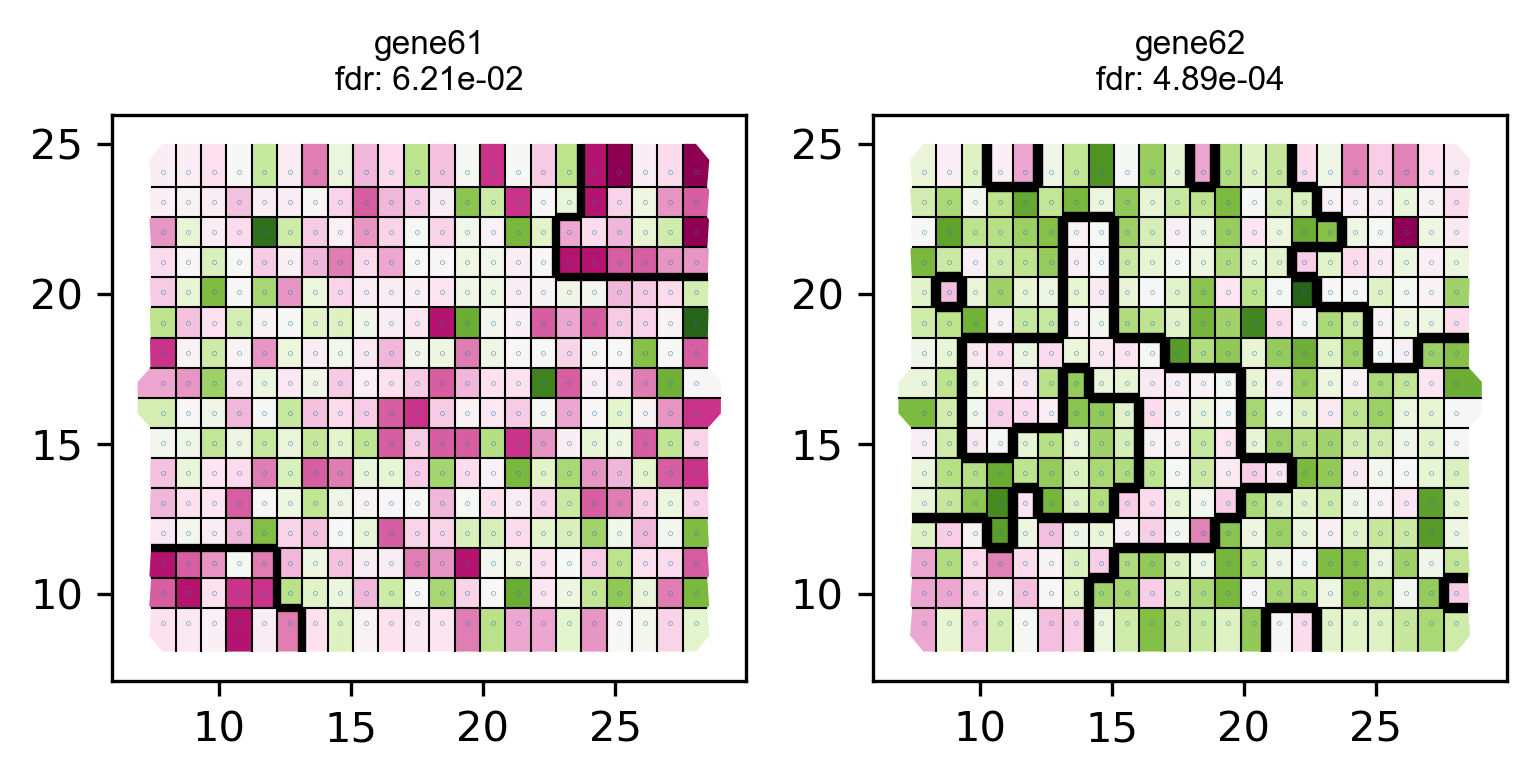

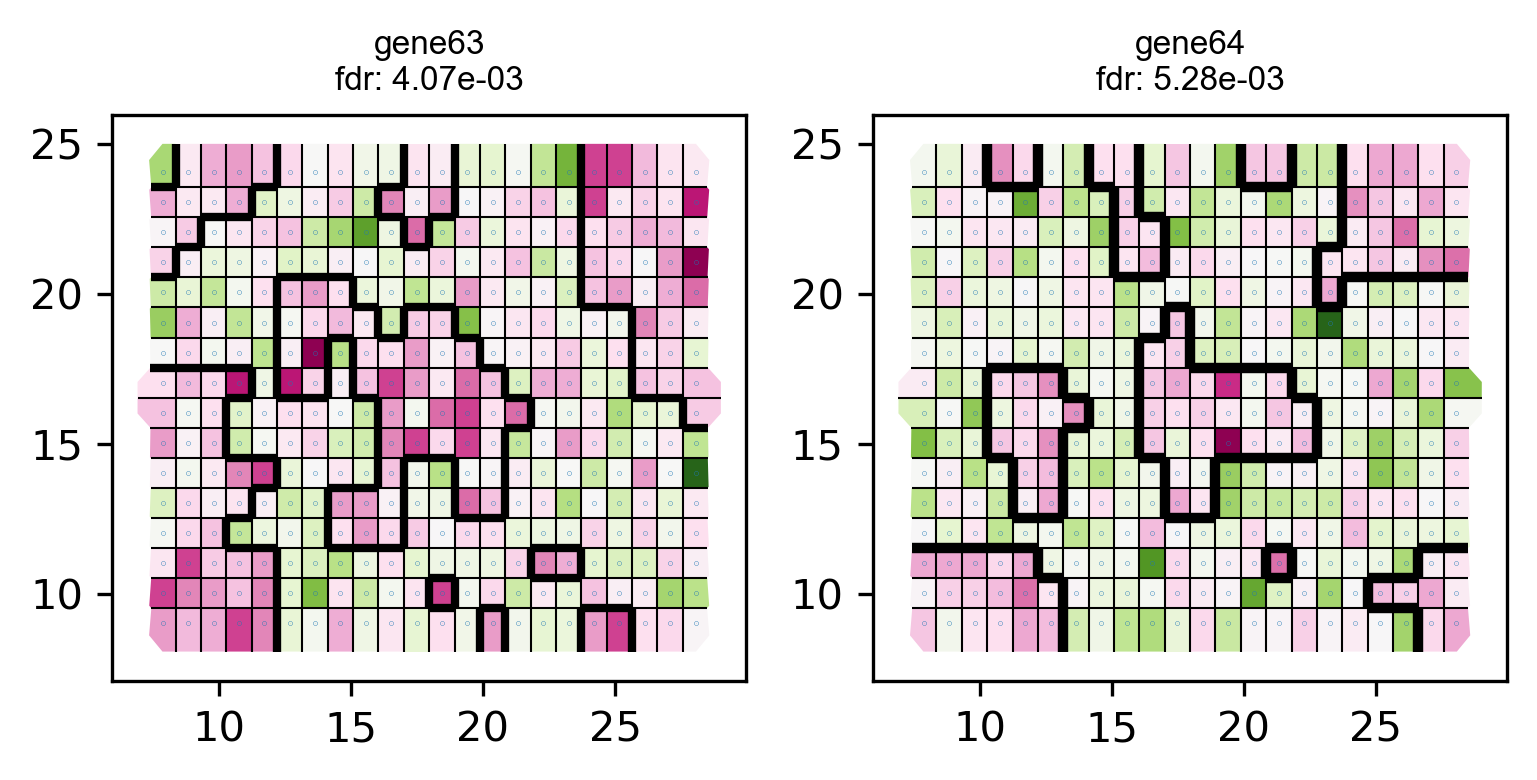

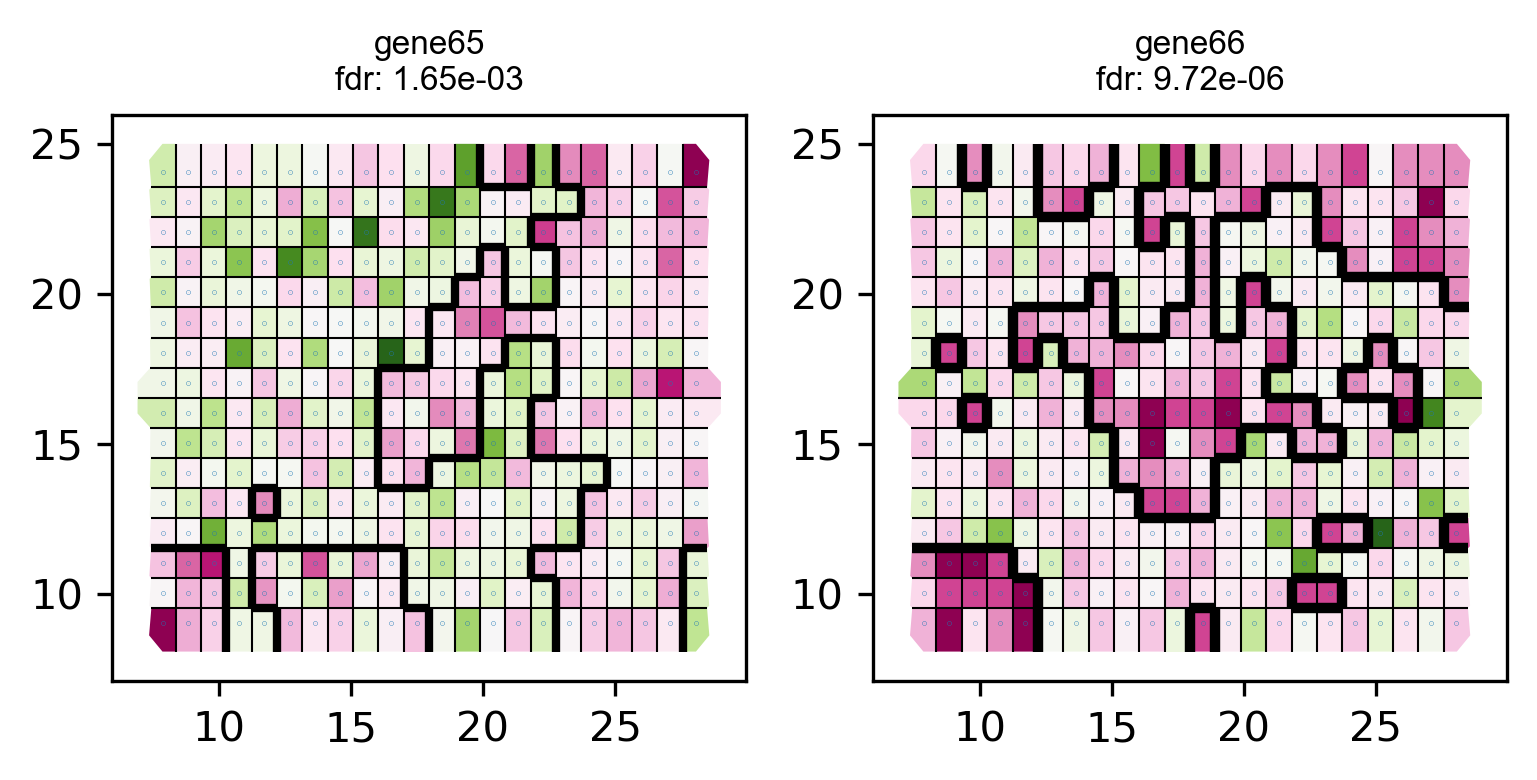

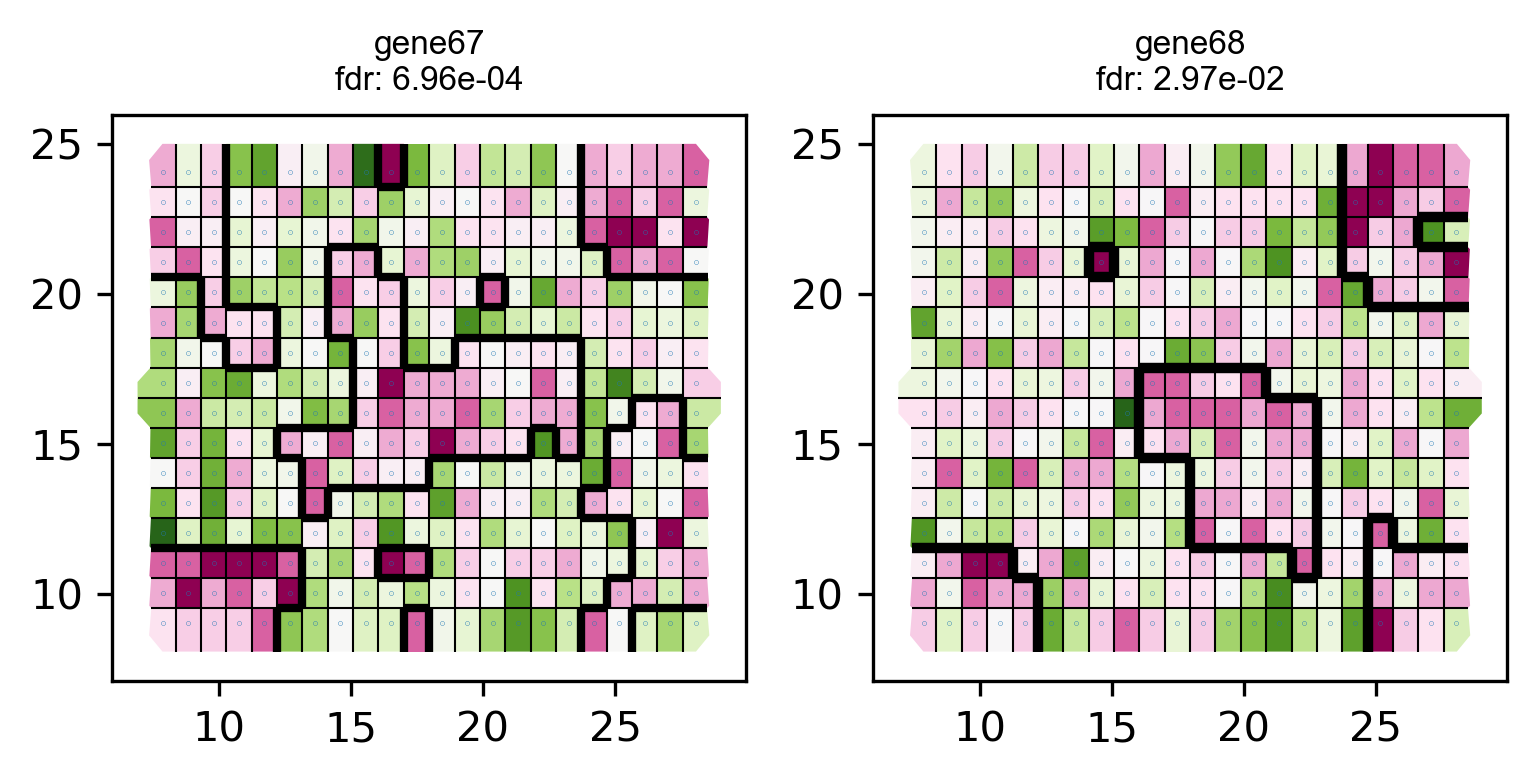

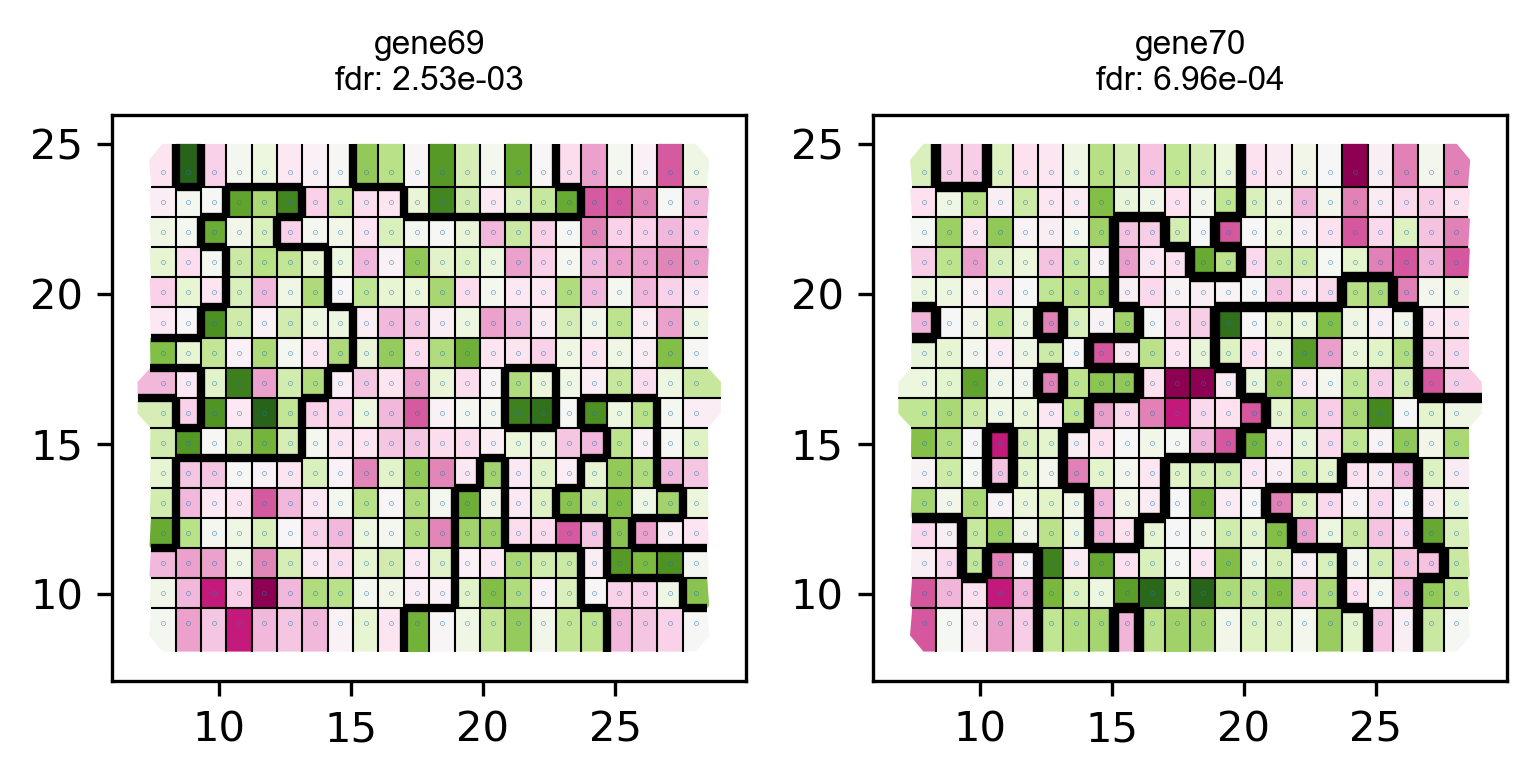

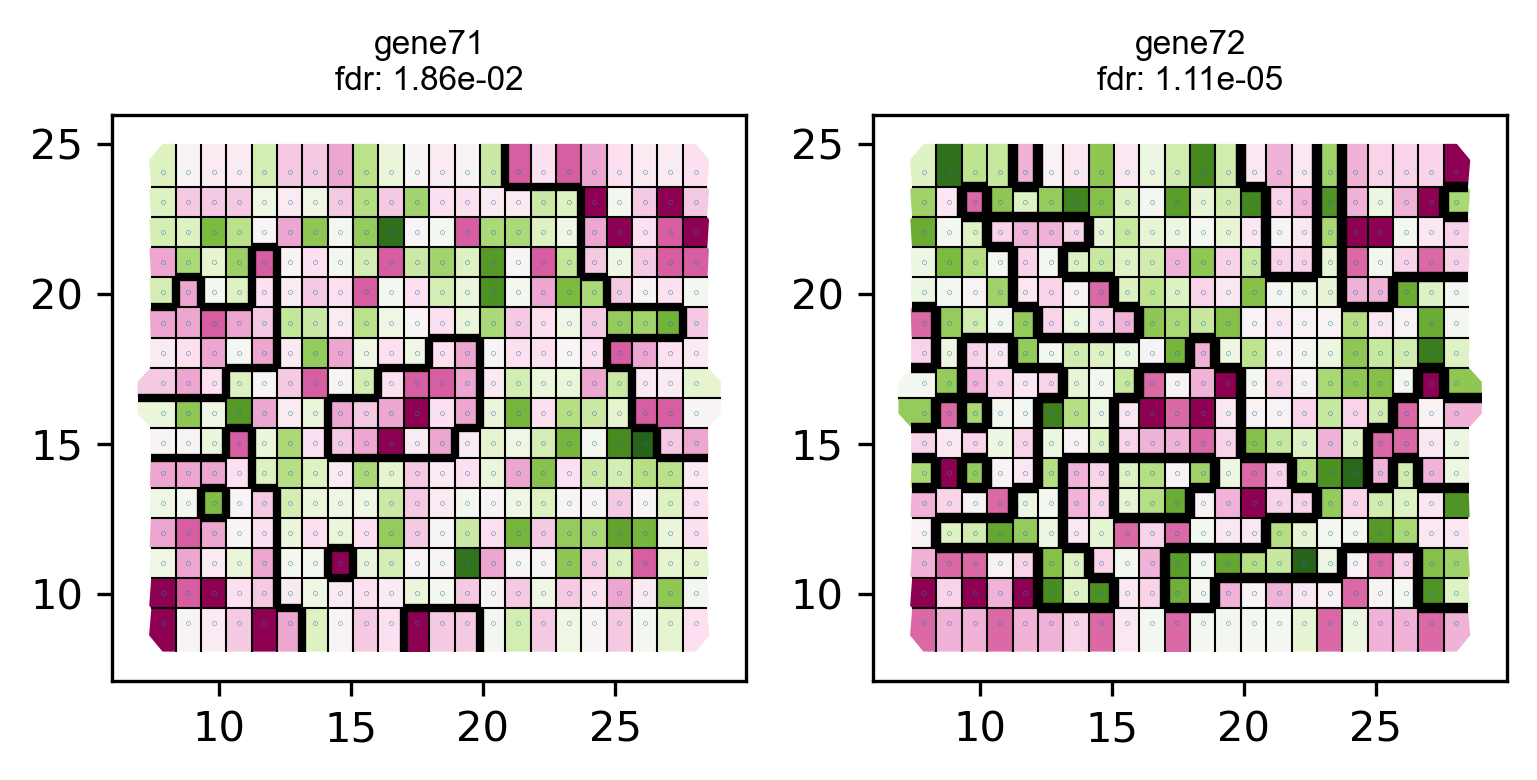

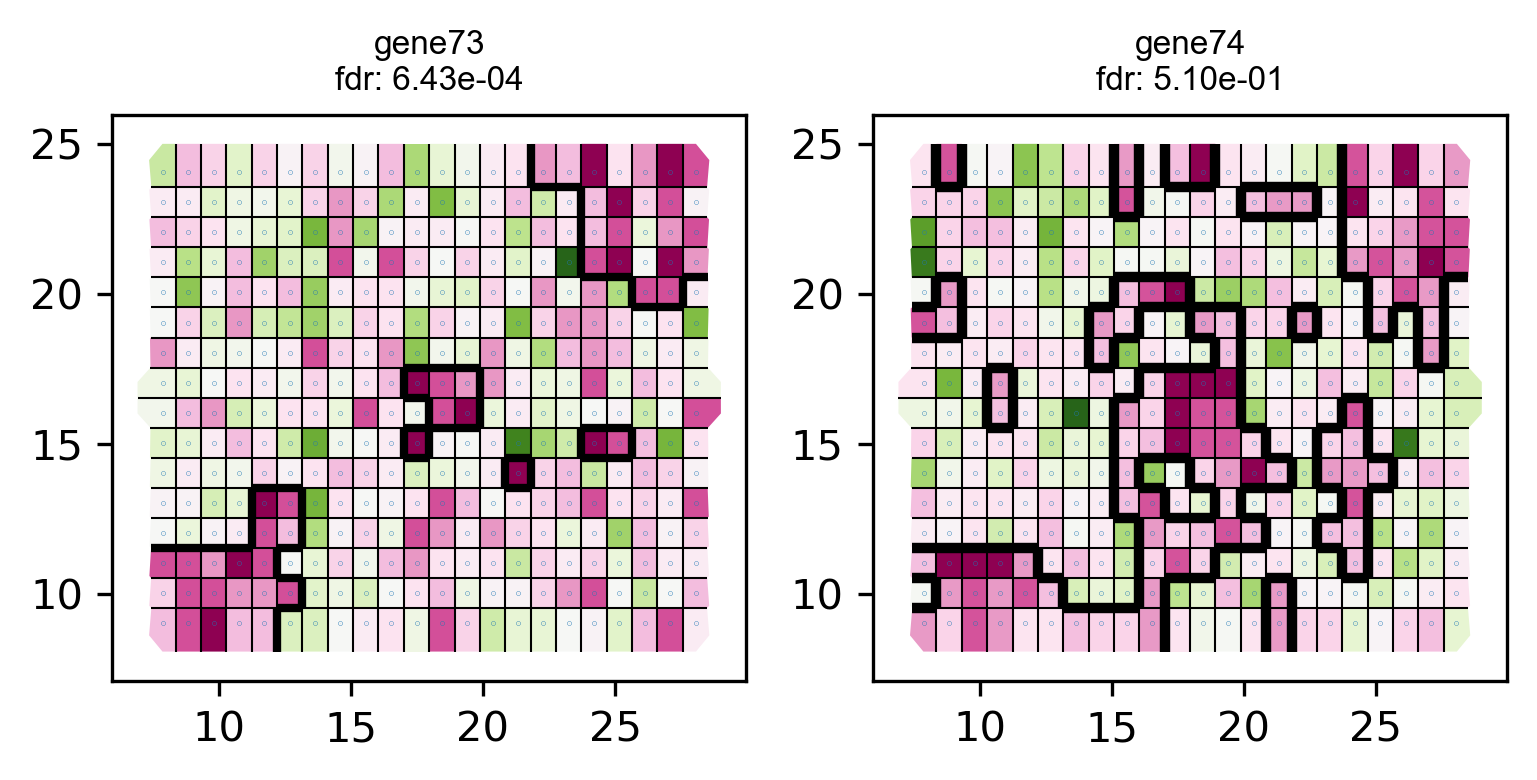

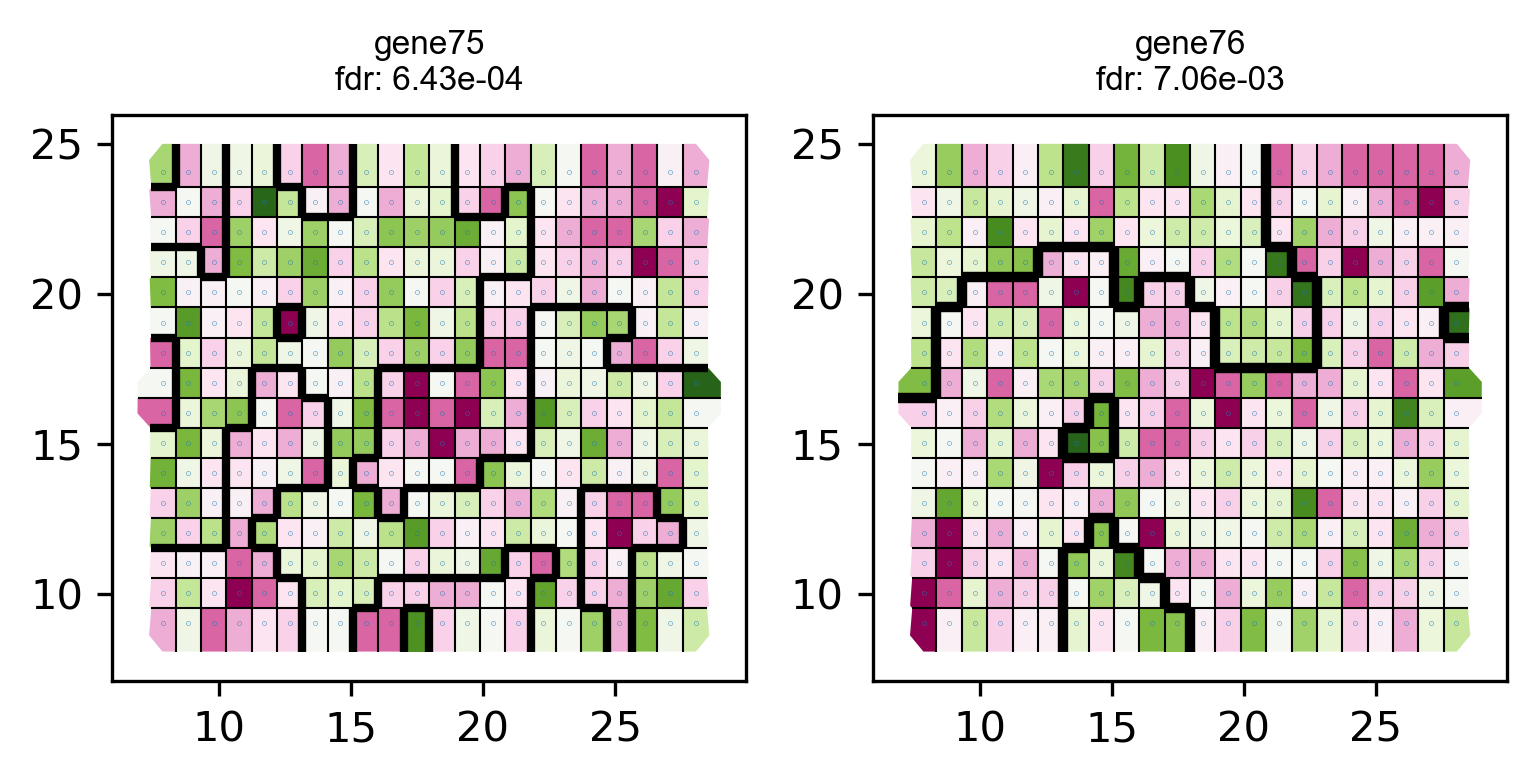

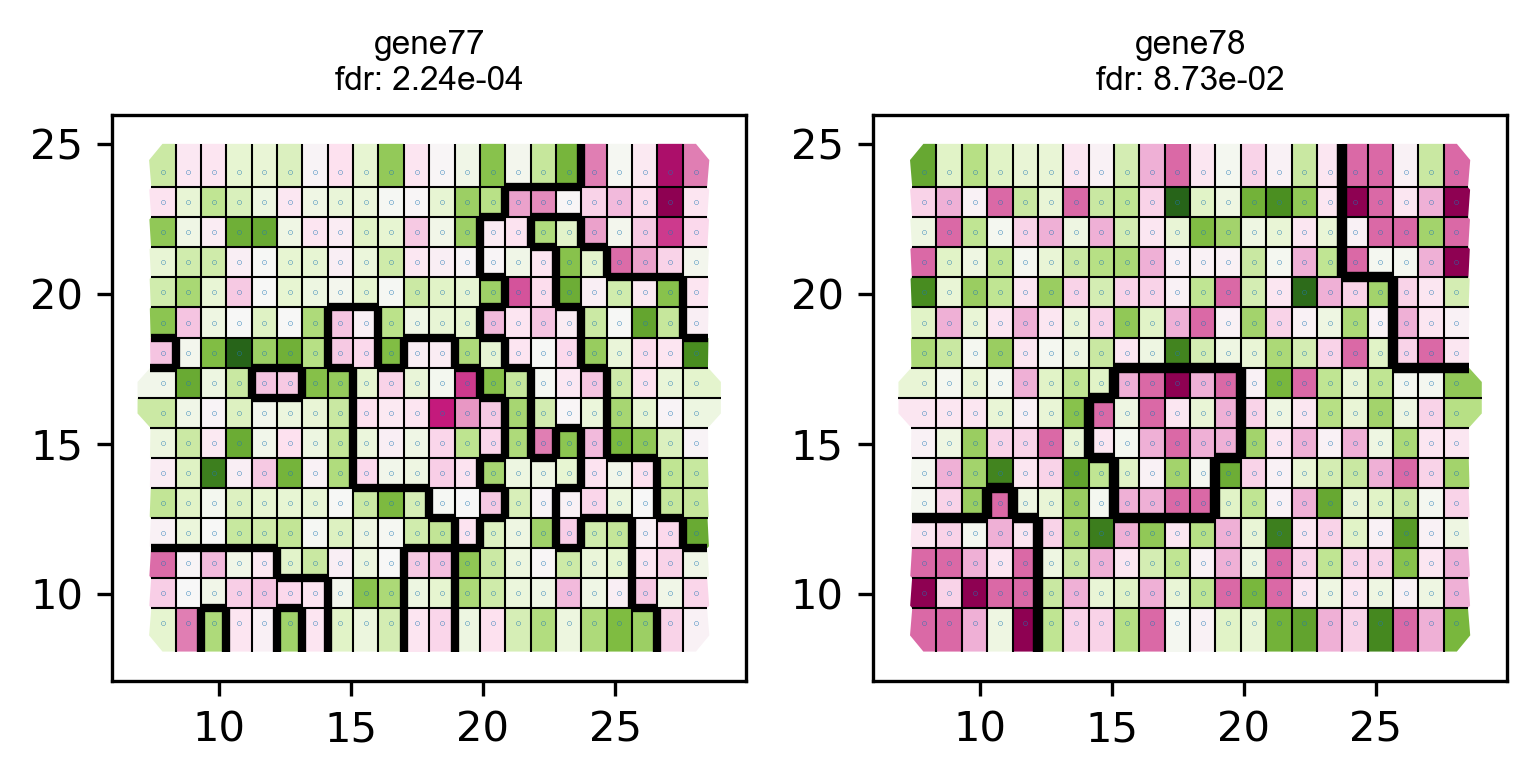

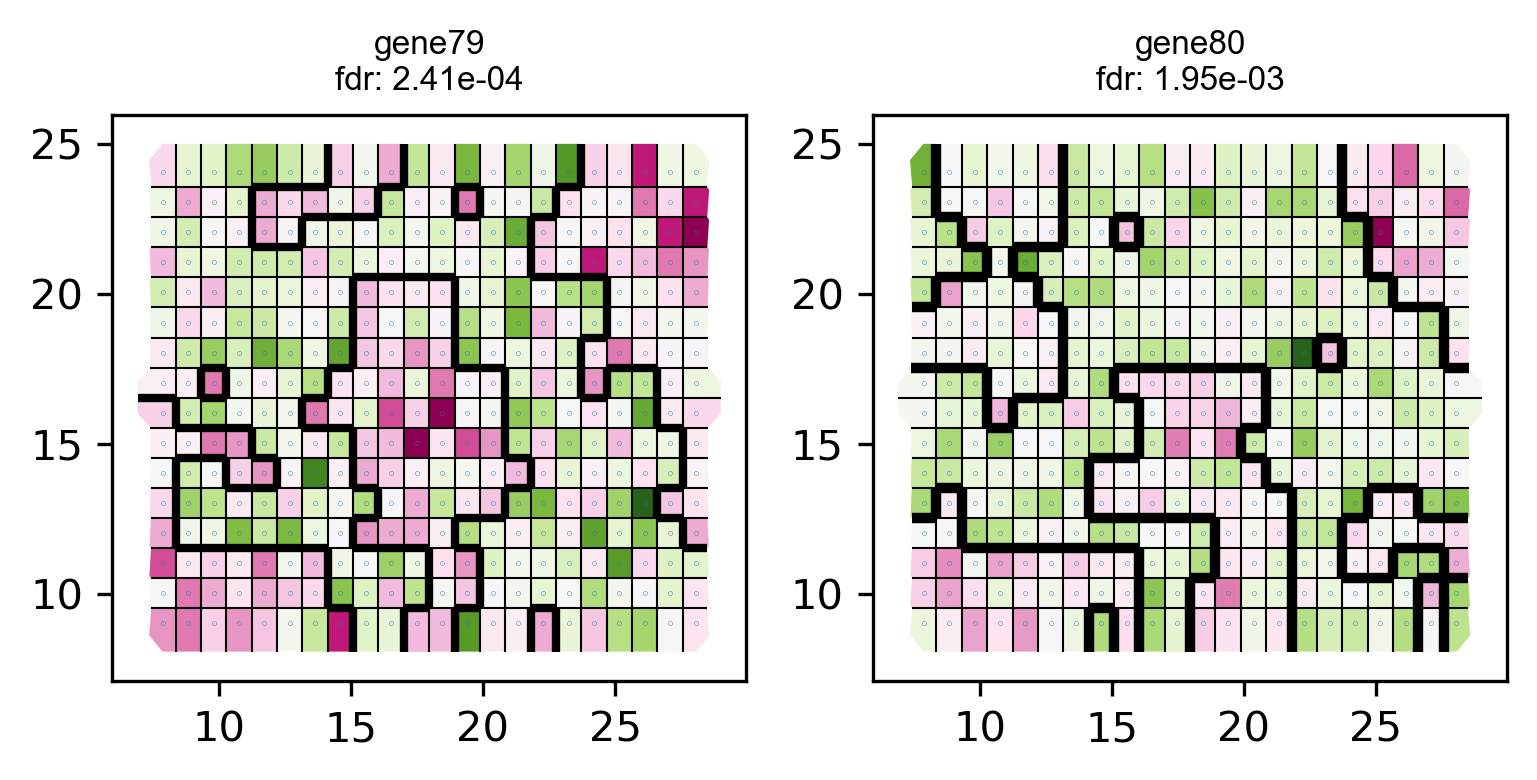

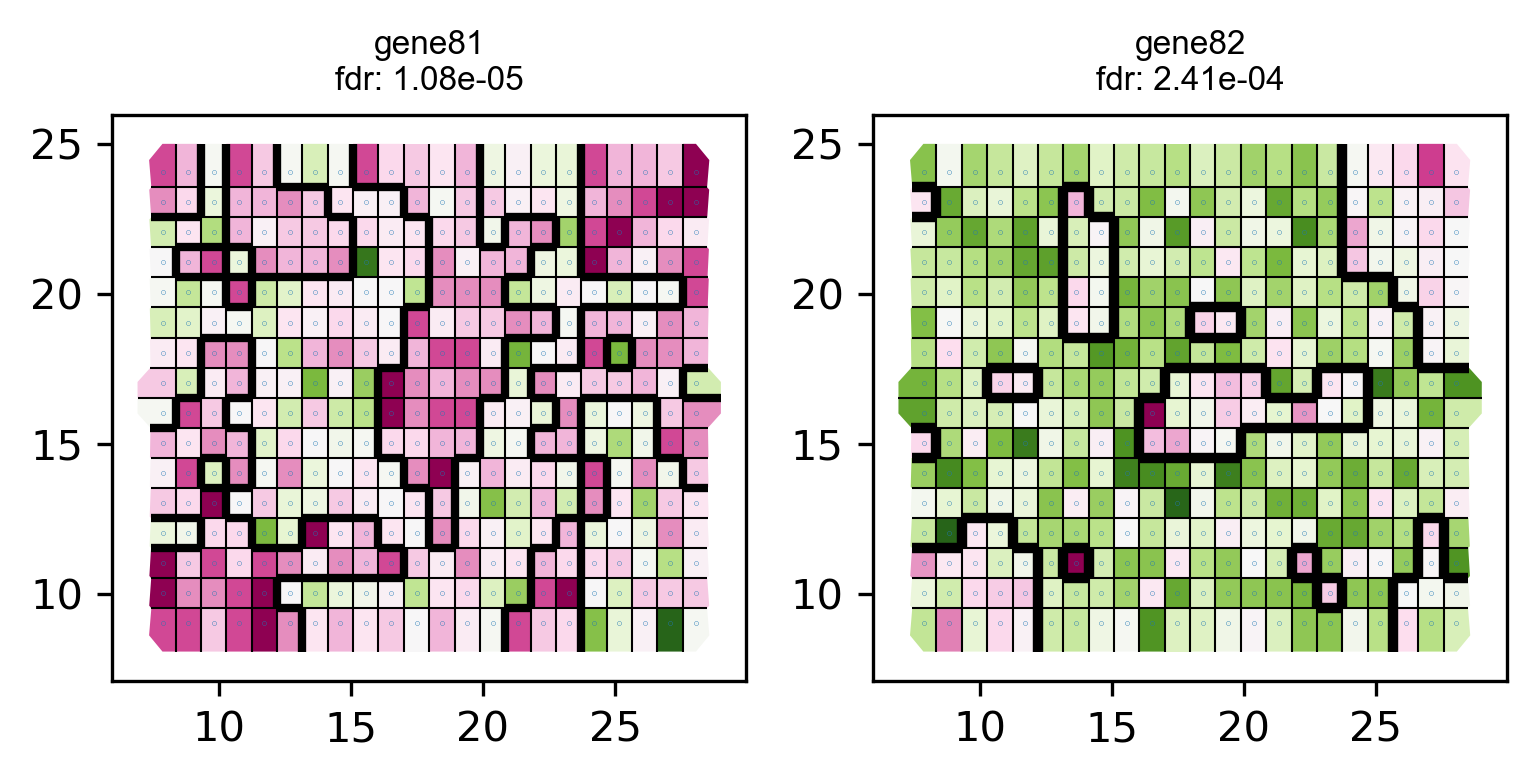

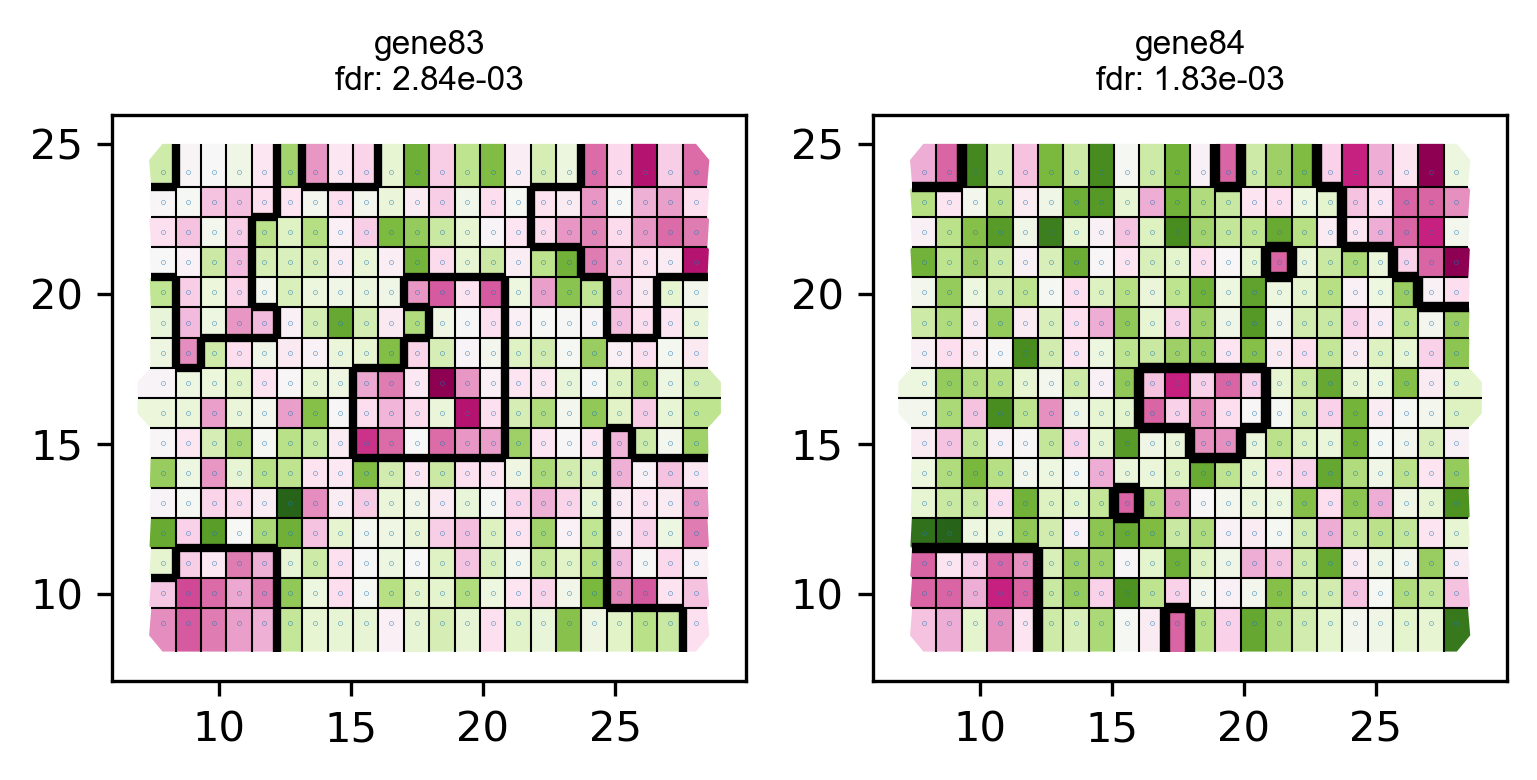

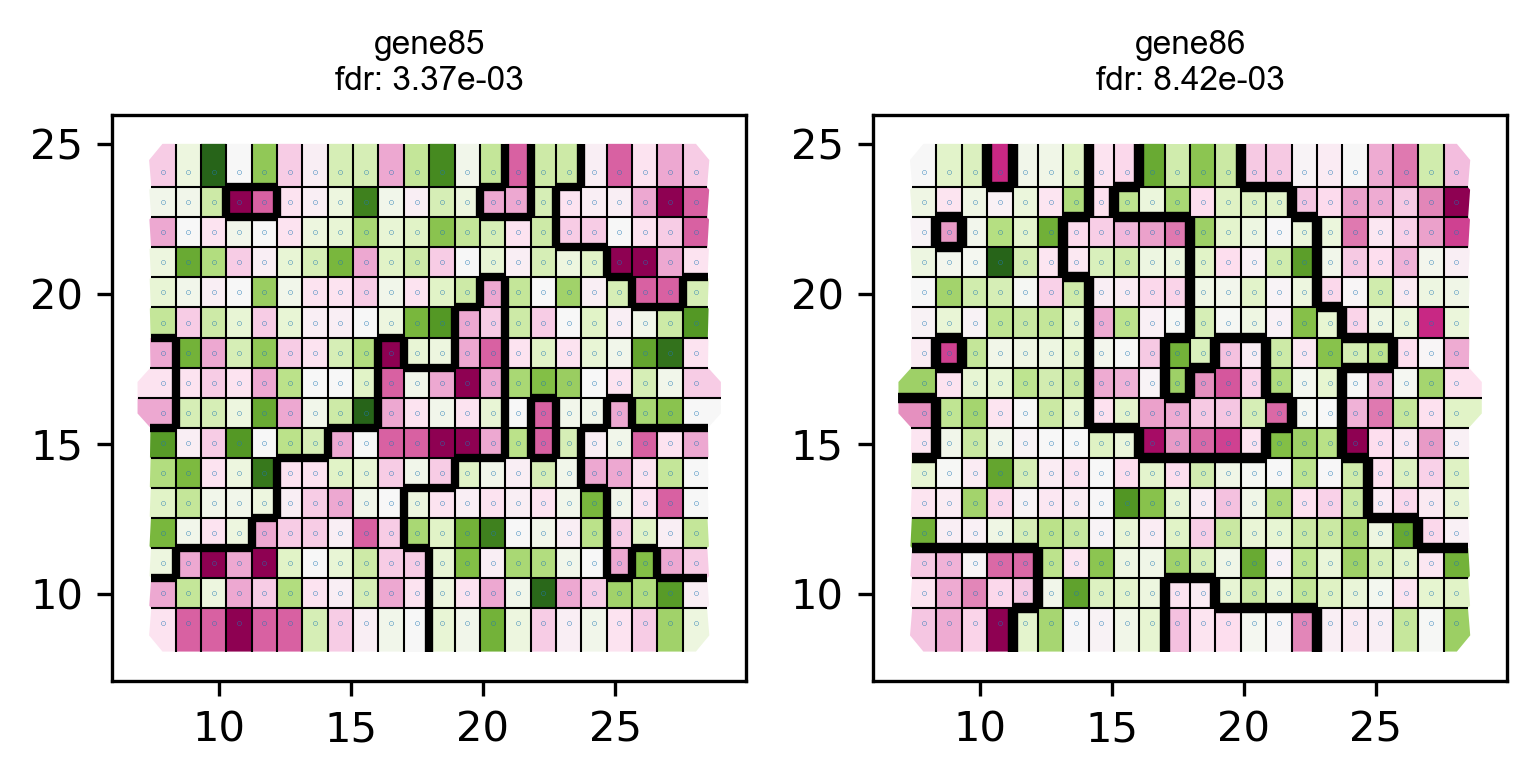

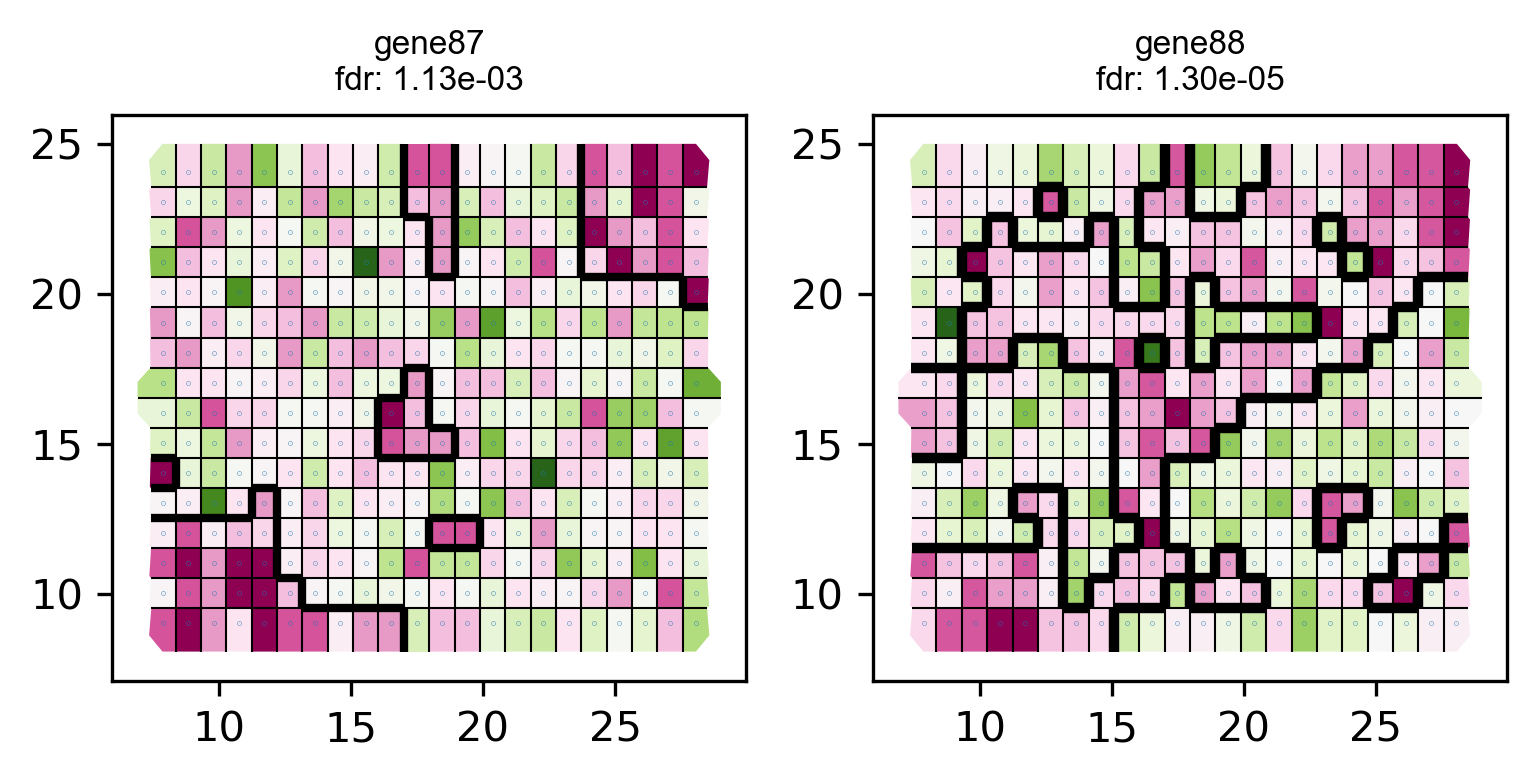

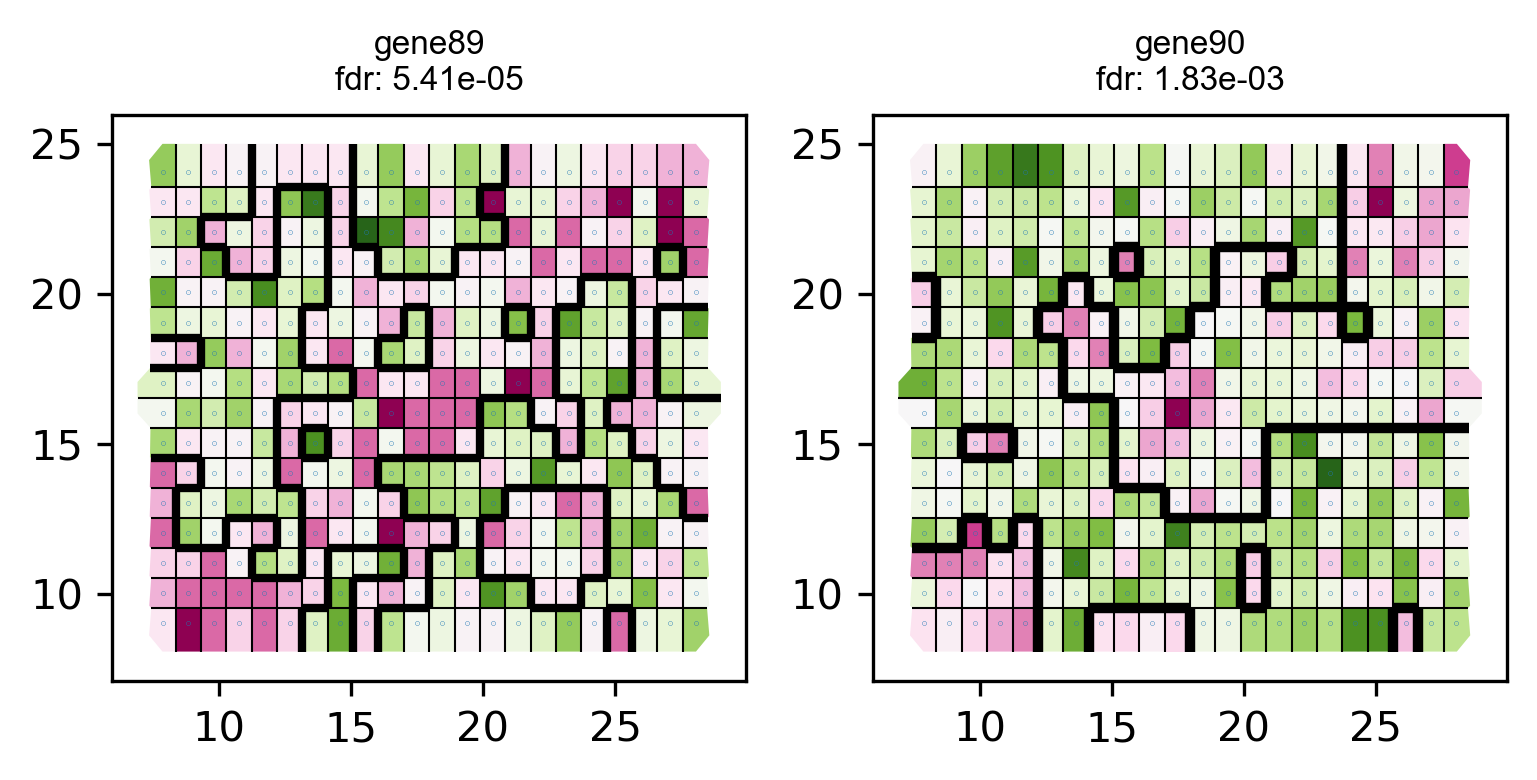

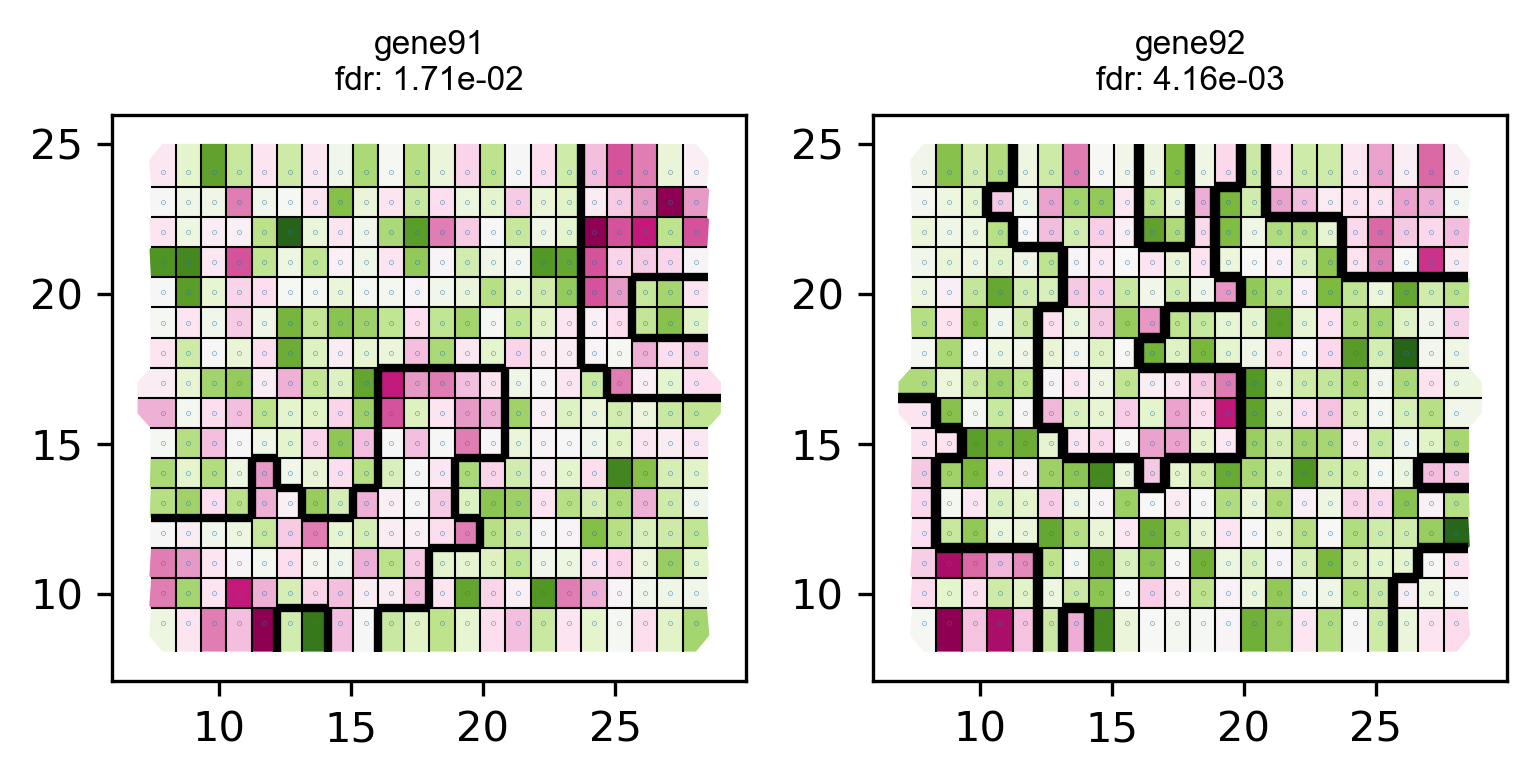

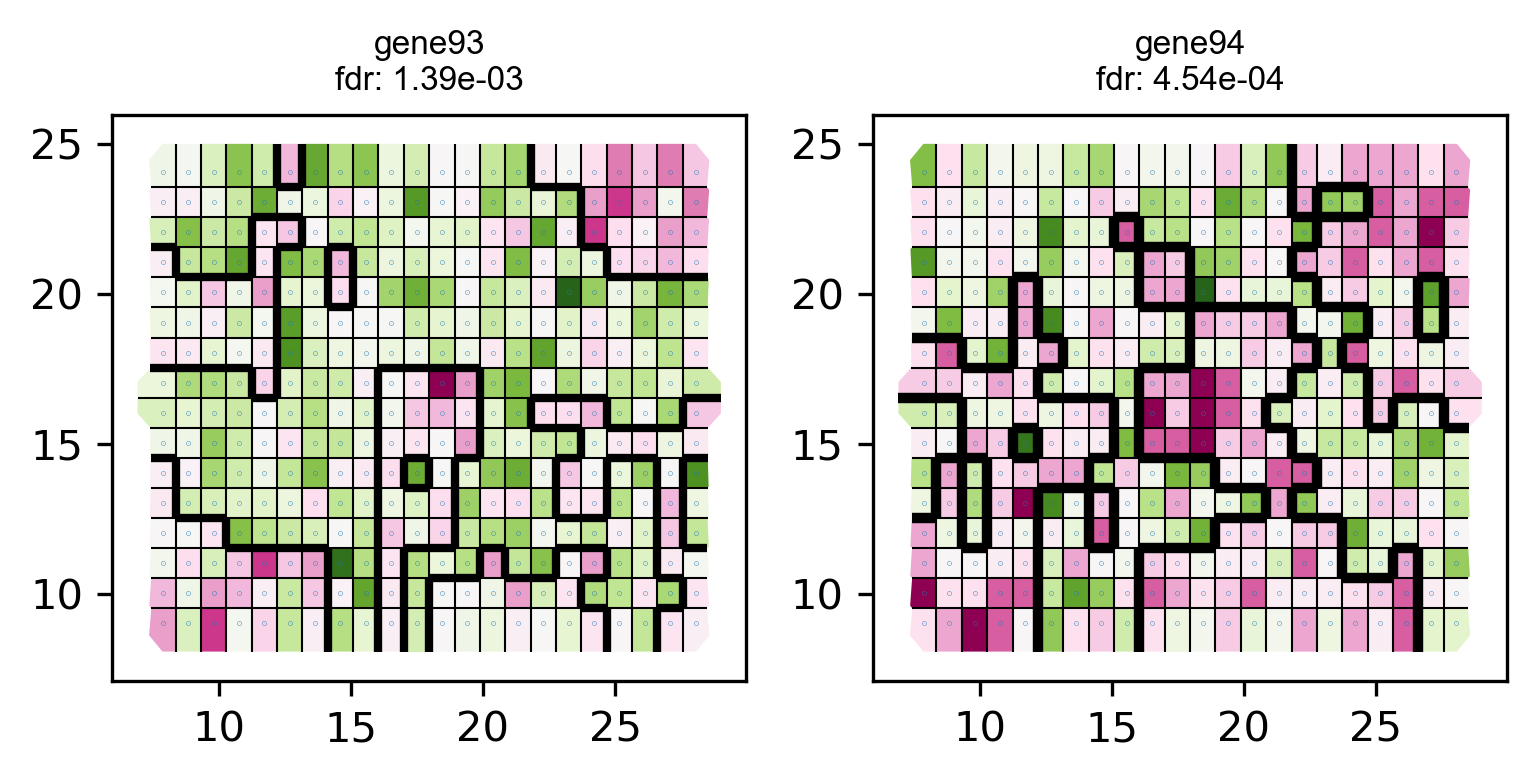

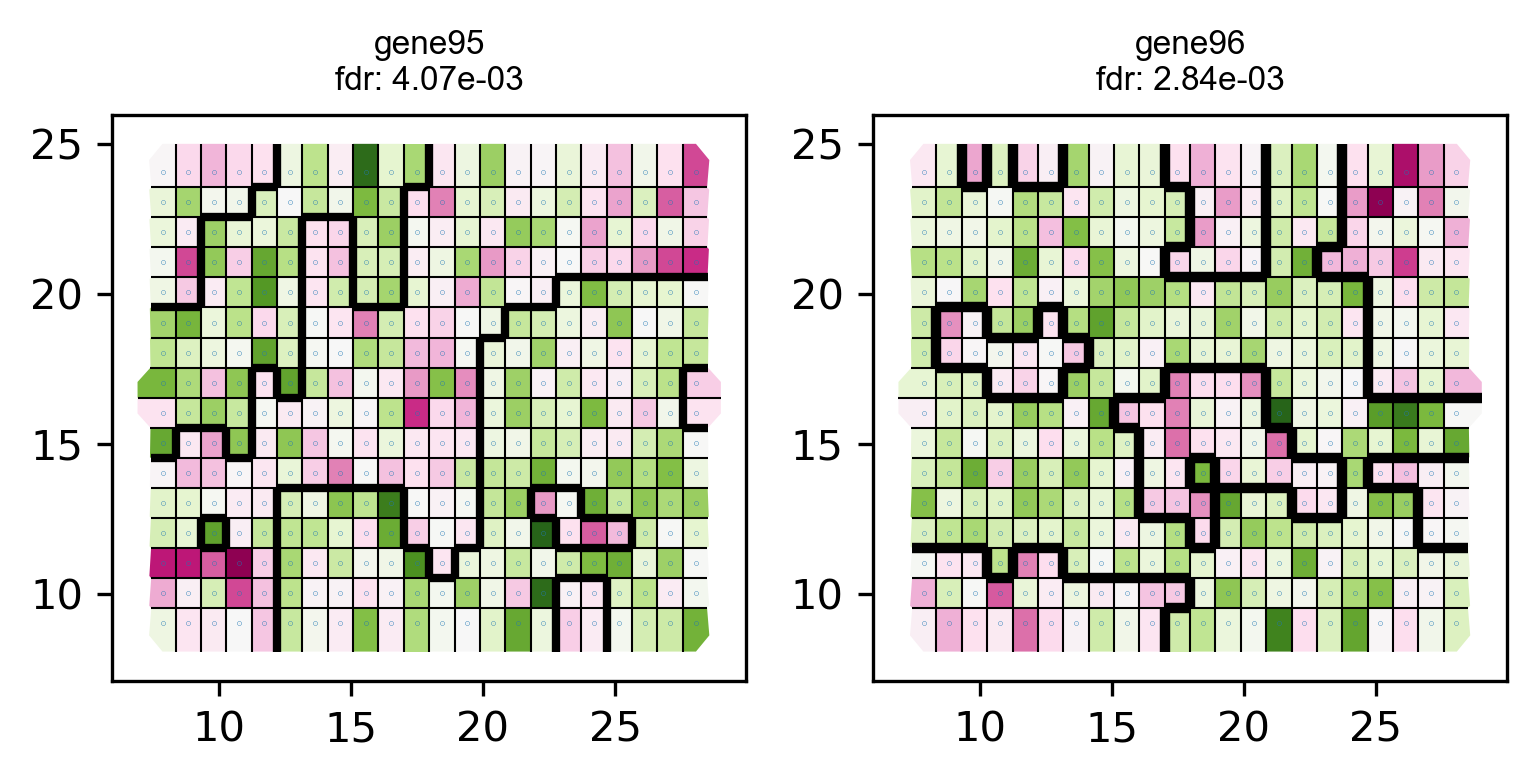

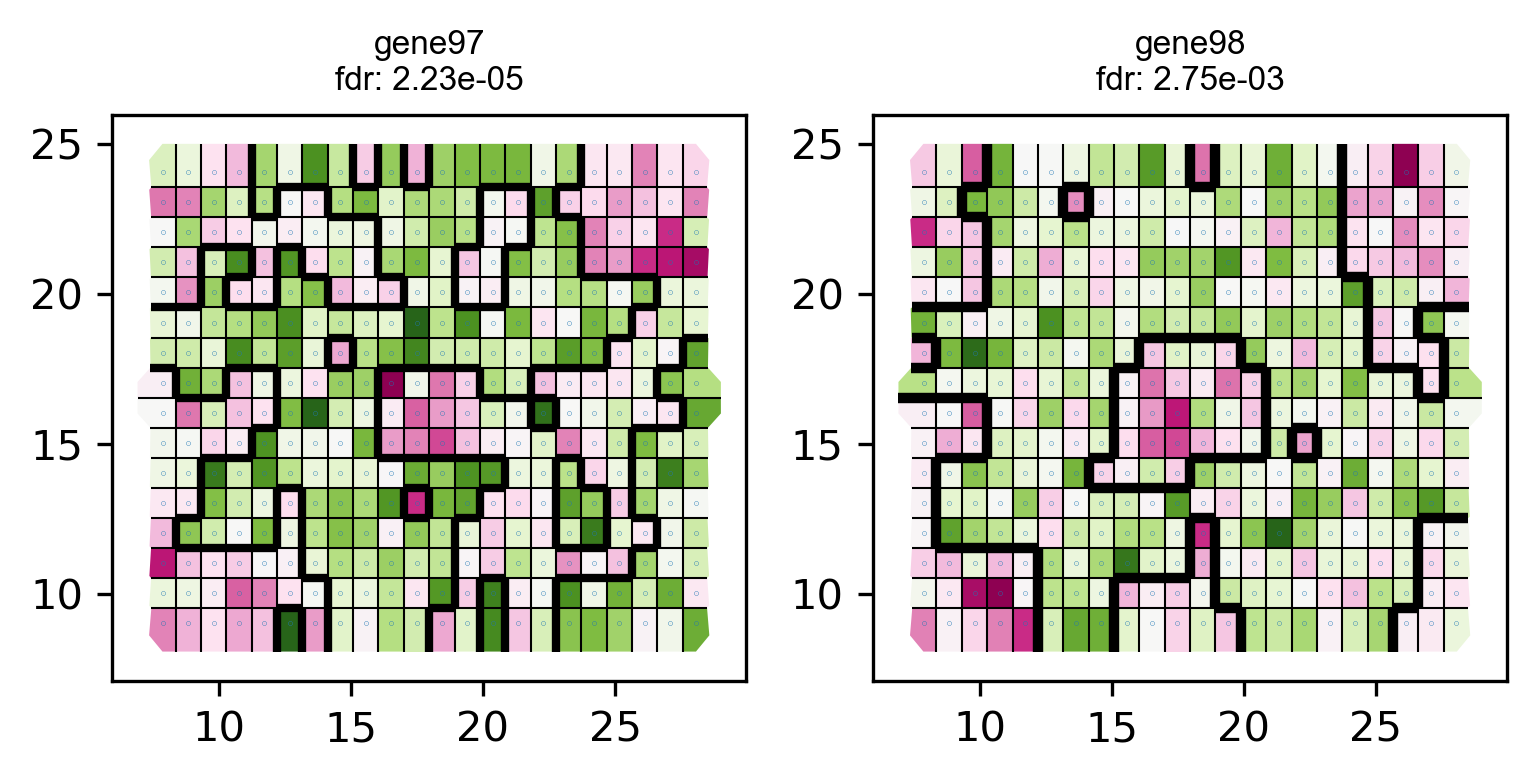

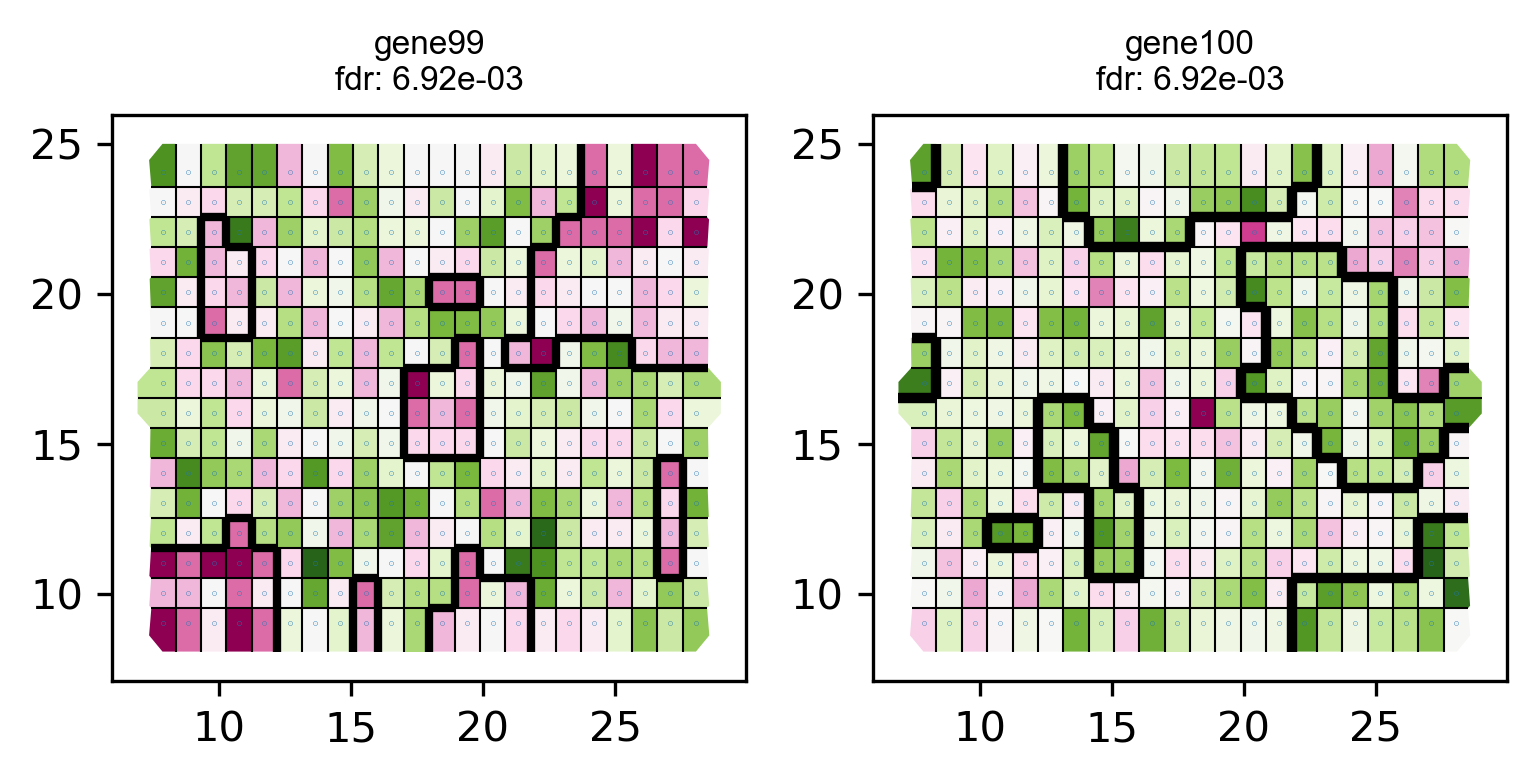

In [6]:
scGCO.visualize_spatial_genes(result_df.iloc[:100,:], locs, sim_data_norm ,point_size=0.2)

In [7]:
sim_data_norm

gene1     gene2     gene3     gene4     gene5     gene6  \
7.888x9.015    2.772589  2.079442  1.386294  3.218876  4.382027  4.025352   
8.848x9.015    2.197225  3.931826  1.386294  3.044522  3.970292  3.583519   
9.808x9.015    2.079442  4.394449  2.079442  4.174387  4.189655  2.833213   
10.768x9.015   2.079442  4.532599  1.098612  2.302585  4.158883  4.510860   
11.728x9.015   1.098612  4.330733  1.098612  3.988984  4.499810  4.488636   
...                 ...       ...       ...       ...       ...       ...   
24.207x24.046  1.386294  4.890349  1.098612  2.079442  2.772589  4.615121   
25.167x24.046  1.386294  4.477337  2.484907  3.465736  2.484907  4.060443   
26.127x24.046  3.044522  5.147494  3.401197  2.564949  2.772589  4.174387   
27.087x24.046  2.484907  3.610918  1.386294  3.135494  4.454347  3.295837   
28.047x24.046  2.079442  4.394449  1.098612  2.890372  4.174387  3.555348   

                  gene7     gene8     gene9    gene10  ...   gene990  \
7.888x9.015    3.555348  2.302585  4.770685  4.304065  ...  1.945910   
8.848x9.015    2.079442  1.791759  3.526361  3.713572  ...  1.945910   
9.808x9.015    1.945910  3.044522  4.143135  4.317488  ...  1.609438   
10.768x9.015   2.197225  2.302585  4.532599  4.060443  ...  2.079442   
11.728x9.015   2.197225  2.944439  4.077537  2.397895  ...  1.945910   
...                 ...       ...       ...       ...  ...       ...   
24.207x24.046  2.639057  2.302585  3.912023  4.382027  ...  1.791759   
25.167x24.046  3.178054  3.988984  6.660575  4.919981  ...  2.197225   
26.127x24.046  3.044522  3.295837  5.620401  3.637586  ...  1.945910   
27.087x24.046  2.995732  3.401197  4.094345  3.761200  ...  1.791759   
28.047x24.046  2.564949  3.663562  5.214936  4.094345  ...  2.079442   

                gene991   gene992   gene993   gene994   gene995   gene996  \
7.888x9.015    0.693147  1.098612  1.945910  0.000000  2.079442  1.945910   
8.848x9.015    1.098612  0.000000  2.197225  0.000000  1.945910  2.197225   
9.808x9.015    0.000000  0.693147  1.386294  0.000000  2.079442  1.945910   
10.768x9.015   1.791759  0.000000  2.079442  0.000000  1.945910  1.791759   
11.728x9.015   0.693147  0.693147  2.197225  0.000000  1.945910  1.945910   
...                 ...       ...       ...       ...       ...       ...   
24.207x24.046  2.564949  1.098612  1.791759  0.000000  1.945910  1.791759   
25.167x24.046  0.693147  1.098612  1.386294  0.693147  2.197225  1.945910   
26.127x24.046  0.693147  0.693147  0.693147  0.000000  2.079442  1.609438   
27.087x24.046  1.386294  1.386294  1.098612  0.000000  1.945910  1.945910   
28.047x24.046  1.609438  1.098612  4.290459  0.000000  1.945910  2.197225   

                gene997   gene998   gene999  
7.888x9.015    0.000000  2.564949  1.386294  
8.848x9.015    1.098612  3.688879  1.609438  
9.808x9.015    1.386294  1.098612  1.098612  
10.768x9.015   0.693147  1.386294  1.609438  
11.728x9.015   0.000000  2.079442  1.386294  
...                 ...       ...       ...  
24.207x24.046  1.609438  2.302585  1.386294  
25.167x24.046  1.098612  0.693147  1.098612  
26.127x24.046  1.386294  2.197225  0.693147  
27.087x24.046  1.098612  1.791759  1.098612  
28.047x24.046  1.098612  1.945910  0.693147  

[352 rows x 958 columns]